In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SCVI/31119515.csv", encoding='latin1')


In [ ]:
print(df.columns)

Index(['caseid', 'weight_a', 'panel', 'qual', 'q1', 'q2a', 'q2b', 'q2c', 'q2d',
       'q2e',
       ...
       'internet', 'housing', 'home_typ', 'phoneser', 'hhsize', 'hh01', 'hh25',
       'hh612', 'hh1317', 'hh18ov'],
      dtype='object', length=113)


In [ ]:
df.describe()

,caseid,quizscor,duration,age,hhsize
count,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000
mean,16075.393821,4.898172,10.922541,48.863577,2.692994
std,13712.946726,2.372877,7.329497,17.239221,1.454707
min,52.000000,0.000000,0.000000,18.000000,1.000000
25%,1933.750000,3.000000,7.000000,34.000000,2.000000
50%,21062.500000,5.000000,9.000000,49.000000,2.000000
75%,29695.500000,7.000000,13.000000,63.000000,4.000000
max,32824.000000,10.000000,83.000000,99.000000,6.000000


In [ ]:
df['state'].value_counts()

,count
state,
Washington,676
Pennsylvania,671
Oklahoma,669
Connecticut,660
Vermont,470
California,199
Florida,106
Texas,104
New York,71


In [ ]:
#df_q7=df[df["age"] >= 50]

In [ ]:
df_q7.shape

NameError: name 'df_q7' is not defined

#GIS

##Q7

In [ ]:
df_q7= df[["q7","age", "state"]]

In [ ]:
df_q7=df_q7[df_q7["age"] >= 50]

In [ ]:
df_q7_concerned=df_q7[df_q7['q7'].isin(['Very concerned', 'Somewhat concerned'])]

In [ ]:
df_q7.isna().sum()

In [ ]:
df_q7.value_counts()


In [ ]:
# Calculate the percentage of concerned participants by state
state_counts = df_q7_concerned['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

total_counts = df_q7[df_q7['age'] >= 50]['state'].value_counts().reset_index()
total_counts.columns = ['state', 'total_count']

percentages = pd.merge(state_counts, total_counts, on='state')
percentages['percentage'] = (percentages['count'] / percentages['total_count']) * 100

In [ ]:
state_coords = {
    'Alabama': (32.806671, -86.791130),
    'Alaska': (61.370716, -152.404419),
    'Arizona': (33.729759, -111.431221),
    'Arkansas': (34.969704, -92.373123),
    'California': (36.116203, -119.681564),
    'Colorado': (39.059811, -105.311104),
    'Connecticut': (41.597782, -72.755371),
    'Delaware': (39.318523, -75.507141),
    'Florida': (27.766279, -81.686783),
    'Georgia': (33.040619, -83.643074),
    'Hawaii': (21.094318, -157.498337),
    'Idaho': (44.240459, -114.478828),
    'Illinois': (40.349457, -88.986137),
    'Indiana': (39.849426, -86.258278),
    'Iowa': (42.011539, -93.210526),
    'Kansas': (38.526600, -96.726486),
    'Kentucky': (37.668140, -84.670067),
    'Louisiana': (31.169546, -91.867805),
    'Maine': (44.693947, -69.381927),
    'Maryland': (39.063946, -76.802101),
    'Massachusetts': (42.230171, -71.530106),
    'Michigan': (43.326618, -84.536095),
    'Minnesota': (45.694454, -93.900192),
    'Mississippi': (32.741646, -89.678696),
    'Missouri': (38.456085, -92.288368),
    'Montana': (46.921925, -110.454353),
    'Nebraska': (41.125370, -98.268082),
    'Nevada': (38.313515, -117.055374),
    'New Hampshire': (43.452492, -71.563896),
    'New Jersey': (40.298904, -74.521011),
    'New Mexico': (34.840515, -106.248482),
    'New York': (42.165726, -74.948051),
    'North Carolina': (35.630066, -79.806419),
    'North Dakota': (47.528912, -99.784012),
    'Ohio': (40.388783, -82.764915),
    'Oklahoma': (35.565342, -96.928917),
    'Oregon': (44.572021, -122.070938),
    'Pennsylvania': (40.590752, -77.209755),
    'Rhode Island': (41.680893, -71.511780),
    'South Carolina': (33.856892, -80.945007),
    'South Dakota': (44.299782, -99.438828),
    'Tennessee': (35.747845, -86.692345),
    'Texas': (31.054487, -97.563461),
    'Utah': (40.150032, -111.862434),
    'Vermont': (44.045876, -72.710686),
    'Virginia': (37.769337, -78.169968),
    'Washington': (47.400902, -121.490494),
    'West Virginia': (38.491226, -80.954456),
    'Wisconsin': (44.268543, -89.616508),
    'Wyoming': (42.755966, -107.302490),
    'District of Columbia': (38.907192, -77.036871)
}



In [ ]:
!pip install folium



In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
# Create a map centered on the USA
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add a heatmap to the map
heat_data = [[state_coords[state][0], state_coords[state][1], percentage] for state, percentage in zip(percentages['state'], percentages['percentage'])]
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save("q7_heatmap.html")

##Q9

In [ ]:
df_q9= df[["q9","age", "state"]]

In [ ]:
df_q9=df_q9[df_q9["age"] >= 50]

In [ ]:
df_q9_yes=df_q9[df_q9['q9'].isin(['Yes'])]

In [ ]:
df_q9.isna().sum()

In [ ]:
df_q9.value_counts()


In [ ]:
# Calculate the percentage of concerned participants by state
state_counts = df_q9_yes['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

total_counts = df_q9[df_q9['age'] >= 50]['state'].value_counts().reset_index()
total_counts.columns = ['state', 'total_count']

percentages = pd.merge(state_counts, total_counts, on='state')
percentages['percentage'] = (percentages['count'] / percentages['total_count']) * 100

In [ ]:
# Create a map centered on the USA
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add a heatmap to the map
heat_data = [[state_coords[state][0], state_coords[state][1], percentage] for state, percentage in zip(percentages['state'], percentages['percentage'])]
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save("q9_heatmap.html")

##Q15

In [ ]:
df_q15= df[["q15","age", "state"]]

In [ ]:
df_q15=df_q15[df_q15["age"] >= 50]

In [ ]:
df_q15_yes=df_q15[df_q15['q15'].isin(['Yes'])]

In [ ]:
df_q15.isna().sum()

In [ ]:
df_q15.value_counts()


In [ ]:
# Calculate the percentage of concerned participants by state
state_counts = df_q15_yes['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

total_counts = df_q15[df_q15['age'] >= 50]['state'].value_counts().reset_index()
total_counts.columns = ['state', 'total_count']

percentages = pd.merge(state_counts, total_counts, on='state')
percentages['percentage'] = (percentages['count'] / percentages['total_count']) * 100

In [ ]:
# Create a map centered on the USA
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add a heatmap to the map
heat_data = [[state_coords[state][0], state_coords[state][1], percentage] for state, percentage in zip(percentages['state'], percentages['percentage'])]
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save("q15_heatmap.html")

##Q22

In [ ]:
df_q22= df[["q22","age", "state"]]

In [ ]:
df_q22=df_q22[df_q22["age"] >= 50]

In [ ]:
df_q22_yes=df_q22[df_q22['q22'].isin(['Yes'])]

In [ ]:
df_q22.isna().sum()

In [ ]:
df_q22.value_counts()


In [ ]:
# Calculate the percentage of concerned participants by state
state_counts = df_q22_yes['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

total_counts = df_q22[df_q22['age'] >= 50]['state'].value_counts().reset_index()
total_counts.columns = ['state', 'total_count']

percentages = pd.merge(state_counts, total_counts, on='state')
percentages['percentage'] = (percentages['count'] / percentages['total_count']) * 100

In [ ]:
# Create a map centered on the USA
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add a heatmap to the map
heat_data = [[state_coords[state][0], state_coords[state][1], percentage] for state, percentage in zip(percentages['state'], percentages['percentage'])]
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save("q22_heatmap.html")

#Bar Charts

##Q8

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df_q8= df[["q8","age"]]

In [ ]:
df_q8=df_q8[df_q8["age"] >= 50]

In [ ]:

df_q8.loc[df_q8['q8'] == ' ', 'q8'] = "Don't Know" ##2 spaces

In [ ]:
df_q8["q8"].value_counts()

In [ ]:
# Aggregate the counts for each level of familiarity
df_q8_agg = df_q8['q8'].value_counts().reset_index()
df_q8_agg.columns = ['q8', 'count']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_q8_agg['q8'], df_q8_agg['count'], color=['blue', 'green', 'red', 'orange', 'gray'])

# Adding labels and title
plt.xlabel('Level of Familiarity with Romance Scams')
plt.ylabel('Count')
plt.title('Familiarity with Romance Scams of Older Adults (Age>=50)')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.savefig('q8_bar.jpg')
plt.show()

##Q14

In [ ]:
df_q14= df[["q14","age"]]

In [ ]:
df_q14=df_q14[df_q14["age"] >= 50]

In [ ]:

df_q14.loc[df_q14['q14'] == ' ', 'q14'] = "Don't Know" ##2 spaces

In [ ]:
df_q14["q14"].value_counts()

In [ ]:
# Aggregate the counts for each level of familiarity
df_q14_agg = df_q14['q14'].value_counts().reset_index()
df_q14_agg.columns = ['q14', 'count']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_q14_agg['q14'], df_q14_agg['count'], color=['blue', 'green', 'red', 'orange', 'gray'])

# Adding labels and title
plt.xlabel('Level of Familiarity with Grandparent Scams')
plt.ylabel('Count')
plt.title('Familiarity with Grandparent Scams of Older Adults (Age>=50)')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.savefig('q14_bar.jpg')
plt.show()

##Q21

In [ ]:
df_q21= df[["q21","age"]]

In [ ]:
df_q21=df_q21[df_q21["age"] >= 50]

In [ ]:

df_q21.loc[df_q21['q21'] == ' ', 'q21'] = "Don't Know" ##2 spaces

In [ ]:
df_q21["q21"].value_counts()

In [ ]:
# Aggregate the counts for each level of familiarity
df_q21_agg = df_q21['q21'].value_counts().reset_index()
df_q21_agg.columns = ['q21', 'count']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_q21_agg['q21'], df_q21_agg['count'], color=['blue', 'green', 'red', 'orange', 'gray'])

# Adding labels and title
plt.xlabel('Level of Familiarity with Government Imposter Scams')
plt.ylabel('Count')
plt.title('Familiarity with Government Imposter Scams of Older Adults (Age>=50)')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.savefig('q21_bar.jpg')
plt.show()

#Pie Chars

##Q9

In [ ]:
df_q9= df[["q9","age"]]

In [ ]:
df_q9=df_q9[df_q9["age"] >= 50]

In [ ]:

df_q9.loc[df_q9['q9'] == ' ', 'q9'] = "Unknown" ##2 spaces

In [ ]:
df_q9["q9"].value_counts()

In [ ]:
# Calculate value counts for each category
counts = df_q9['q9'].value_counts()

# Labels for the pie chart
labels = ['No', 'Yes', "Unknown", 'Not sure']

# Calculate value counts for each category
counts = df_q9['q9'].value_counts()

# Extract counts for each label in the order of 'labels'
sizes = [counts[label]for label in labels]

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']

# Define explode to highlight certain slices (e.g., 'Yes')
explode = (0,0.1,0,0)  # Explode 'No' and 'Don't Know
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Adding title
plt.title("Older adult's (Age>=50) Experience Levels with Romance Scams\n")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.savefig('q9_pie.jpg')
# Show plot
plt.show()

# Show plot
plt.show()

##Q15

In [ ]:
df_q15= df[["q15","age"]]

In [ ]:
df_q15=df_q15[df_q15["age"] >= 50]

In [ ]:

df_q15.loc[df_q15['q15'] == ' ', 'q15'] = "Unknown" ##2 spaces

In [ ]:
df_q15["q15"].value_counts()

In [ ]:
# Calculate value counts for each category
counts = df_q15['q15'].value_counts()

# Labels for the pie chart
labels = ['No','REFUSED' ,'Yes', "Unknown", 'Not sure']

# Calculate value counts for each category
counts = df_q15['q15'].value_counts()

# Extract counts for each label in the order of 'labels'
sizes = [counts[label]for label in labels]
print(sizes)
# Define custom colors for each label
colors = ['lightblue','lightgreen' ,'lightcoral', 'lightpink', 'lightskyblue']

# Define explode to highlight certain slices (e.g., 'Yes')
explode = (0,0,0.1,0,0)  # Explode 'No' and 'Don't Know
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Adding title
plt.title("Older adult's (Age>=50) Experience Levels with Grandparent Scams\n")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.savefig('q15_pie.jpg')
# Show plot
plt.show()

# Show plot
plt.show()

##Q22

In [ ]:
df_q22= df[["q22","age"]]

In [ ]:
df_q22=df_q22[df_q22["age"] >= 50]

In [ ]:

df_q22.loc[df_q22['q22'] == ' ', 'q22'] = "Unknown" ##2 spaces

In [ ]:
df_q22["q22"].value_counts()

In [ ]:
# Calculate value counts for each category
counts = df_q22['q22'].value_counts()

# Labels for the pie chart
labels = ['No' ,'Yes', "Unknown", 'Not sure']



# Extract counts for each label in the order of 'labels'
sizes = [counts[label]for label in labels]
print(sizes)
# Define custom colors for each label
colors = ['lightblue' ,'lightpink', 'lightcoral', 'lightskyblue']

# Define explode to highlight certain slices (e.g., 'Yes')
explode = (0,0.1,0,0)  # Explode 'No' and 'Don't Know
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Adding title
plt.title("Older adult's (Age>=50) Experience Levels with Govenment Imposter Scams\n")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.savefig('q22_pie.jpg')
# Show plot
plt.show()

# Show plot
plt.show()

#Age Group Distribution

##Scammed

In [ ]:
df_age= df[["q9","q15","q22","age"]]

In [ ]:
df_age=df_age[df_age["age"] >= 50]

In [ ]:

df_age.replace({'q9': {'REFUSED': 'Unknown', ' ': 'Unknown'},
            'q15': {'REFUSED': 'Unknown', ' ': 'Unknown'},
            'q22': {'REFUSED': 'Unknown', ' ': 'Unknown'}}, inplace=True)

In [ ]:
df_age['q9'].value_counts()

In [ ]:
df_age['q15'].value_counts()

In [ ]:
df_age['q22'].value_counts()

In [ ]:
# Define age groups
df_age['age_group'] = pd.cut(df_age['age'], bins=[50, 59, 69, 120], labels=['50-59', '60-69', '70+'])

# Group by age group and count occurrences of each response
grouped = df_age.groupby('age_group')[['q9', 'q15', 'q22']].apply(lambda x: x.apply(pd.value_counts)).unstack().fillna(0)

# Ensure all labels are present in each group's data
response_labels = ['No', 'Yes', 'Not sure', 'Unknown']
for col in ['q9', 'q15', 'q22']:
    for label in response_labels:
        if label not in grouped[col]:
            grouped[col][label] = 0

# Plotting stacked bar chart
age_groups = ['50-59', '60-69', '70+']
bar_width = 0.35
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']

# Function to create each plot
def create_plot(scam_column, scam_title):
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = range(len(age_groups))
    bottoms = [0] * len(age_groups)
    for response, color in zip(response_labels, colors):
        counts = [grouped.loc[age_group, (scam_column, response)] for age_group in age_groups]
        bars = ax.bar(positions, counts, bar_width, bottom=bottoms, color=color, align='center', alpha=0.8, label=response)
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            ax.annotate(f'{int(count)}', xy=(bar.get_x() + bar.get_width() / 2, height + bottom), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom', fontsize=8)
        bottoms = [bottoms[i] + counts[i] for i in range(len(bottoms))]

    ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {scam_title} Across Age Groups')
    ax.set_xticks(range(len(age_groups)))
    ax.set_xticklabels(age_groups, rotation=0, ha='center')
    ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'stacked_{scam_title}.jpg')
    plt.show()

# Create each plot


In [ ]:
create_plot('q9', 'Romance Scams')


In [ ]:
create_plot('q15', 'Grandparent Scams')


In [ ]:

create_plot('q22', 'Government Imposter Scams')

##Concern

In [ ]:
df_age= df[["q8","q14","q21","age"]]

In [ ]:
df_age=df_age[df_age["age"] >= 50]

In [ ]:

df_age.replace({'q8': {'REFUSED': 'Unknown', ' ': 'Unknown'},
            'q14': {'REFUSED': 'Unknown', ' ': 'Unknown'},
            'q21': {'REFUSED': 'Unknown', ' ': 'Unknown'}}, inplace=True)

In [ ]:
df_age['q8'].value_counts()

In [ ]:
df_age['q14'].value_counts()

In [ ]:
df_age['q21'].value_counts()

In [ ]:
# Define age groups
df_age['age_group'] = pd.cut(df_age['age'], bins=[50, 59, 69, 120], labels=['50-59', '60-69', '70+'])

# Group by age group and count occurrences of each response
grouped = df_age.groupby('age_group')[['q8', 'q14', 'q21']].apply(lambda x: x.apply(pd.value_counts)).unstack().fillna(0)

# Ensure all labels are present in each group's data
response_labels = ['Very', 'Somewhat','A little','Not at all','Unknown','SKIPPED ON WEB']
for col in ['q8', 'q14', 'q21']:
    for label in response_labels:
        if label not in grouped[col]:
            grouped[col][label] = 0

# Plotting stacked bar chart
age_groups = ['50-59', '60-69', '70+']
bar_width = 0.35
colors = ['lightcoral','lightblue', 'lightgreen',  'lightskyblue', 'lightgrey', 'lightyellow']

# Function to create each plot
def create_plot(scam_column, scam_title):
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = range(len(age_groups))
    bottoms = [0] * len(age_groups)
    for response, color in zip(response_labels, colors):
        counts = [grouped.loc[age_group, (scam_column, response)] for age_group in age_groups]
        bars = ax.bar(positions, counts, bar_width, bottom=bottoms, color=color, align='center', alpha=0.8, label=response)
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            ax.annotate(f'{int(count)}', xy=(bar.get_x() + bar.get_width() / 2, height + bottom), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom', fontsize=8)
        bottoms = [bottoms[i] + counts[i] for i in range(len(bottoms))]

    ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.set_title(f'Concern of {scam_title} Across Age Groups')
    ax.set_xticks(range(len(age_groups)))
    ax.set_xticklabels(age_groups, rotation=0, ha='center')
    ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'stacked_concern{scam_title}.jpg')
    plt.show()

# Create each plot


In [ ]:
create_plot('q8', 'Romance Scams')


In [ ]:
create_plot('q14', 'Grandparent Scams')


In [ ]:

create_plot('q21', 'Government Imposter Scams')

#Top 3 states

In [ ]:
df_states= df[["q9","q15","q22","state"]]

In [ ]:
df_states['q9'].value_counts()

In [ ]:
df_states['q15'].value_counts()

In [ ]:
df_states['q22'].value_counts()

In [ ]:
# Filter only 'Yes' responses for each question
df_yes_responses = df_states[(df_states['q9'] == 'Yes') | (df_states['q15'] == 'Yes') | (df_states['q22'] == 'Yes')]

# Count 'Yes' responses per state for each question
yes_counts = df_yes_responses.groupby('state').agg({
    'q9': lambda x: (x == 'Yes').sum(),
    'q15': lambda x: (x == 'Yes').sum(),
    'q22': lambda x: (x == 'Yes').sum()
}).reset_index()

# Add a total 'Yes' responses column
yes_counts['total_yes'] = yes_counts['q9'] + yes_counts['q15'] + yes_counts['q22']

# Get the top 3 states with the most 'Yes' responses
top_3_states = yes_counts.nlargest(52, 'total_yes')

print(top_3_states)

In [ ]:
# Get the top 3 states with the most occurrences
top_3_states = df_states['state'].value_counts().nlargest(3)

print(top_3_states)

#IVI

In [ ]:
import numpy as np

# Lack of Familiarity A1,k

def encode_concern(response):
    mapping = {
        "Very concerned": 0,
        "Somewhat concerned": 1,
        "Not too concerned": 2,
        "Not at all concerned": 3
    }
    return mapping.get(response, np.nan)  # Return NaN for "DON’T KNOW/ SKIPPED ON WEB/REFUSED"

def encode_familiarity(response):
    mapping = {
        "Very": 0,
        "Somewhat": 1,
        "A little": 2,
        "Not at all": 3
    }
    return mapping.get(response, np.nan)

# Knowledge of Protect Measure A2,k

def encode_protect_measure(response):
    mapping = {
        "True": 0,
        "False": 5,
        "Not sure": 3
    }
    return mapping.get(response, np.nan)

# Frequency of behaviors increasing the risk of attack B1,k

def encode_frequency(response):
    mapping = {
        "Daily": 5,
        "Several times a week": 4,
        "Several times a month": 3,
        "Once a month": 2,
        "Less than once a month": 1,
        "Never": 0
    }
    return mapping.get(response, np.nan)

def encode_meeting_partners(response):
    mapping = {
        "Yes": 5,
        "No": 0,
        "Not sure": 3
    }
    return mapping.get(response, np.nan)

# Trust level related to attack P1,k

def encode_positive_traits(response):
    mapping = {
        "This describes me very well": 5,
        "This describes me somewhat": 3,
        "This does not describe me at all": 0
    }
    return mapping.get(response, np.nan)

def encode_negative_traits(response):
    mapping = {
        "This describes me very well": 0,
        "This describes me somewhat": 3,
        "This does not describe me at all": 5
    }
    return mapping.get(response, np.nan)

# Risk perception and impulsivity P2,k

def encode_romantic_relationship(response):
    mapping = {
        "Yes": 5,
        "No": 0
    }
    return mapping.get(response, np.nan)

def encode_impulsivity_traits(response):
    mapping = {
        "Very well": 5,
        "Somewhat": 3,
        "Not at all": 0
    }
    return mapping.get(response, np.nan)

# Past encounters E1,k

def encode_past_encounters(response):
    mapping = {
        "Yes": 5,
        "No": 0,
        "Not sure": 3
    }
    return mapping.get(response, np.nan)

def encode_others_encounters(response):
    mapping = {
        "Yes": 0,
        "No": 5,
        "Not sure": 3
    }
    return mapping.get(response, np.nan)

def encode_identity_theft_timing(response):
    mapping = {
        "less than a year": 1,
        "1-2 years": 2,
        "3-5 years": 3,
        "5-9 years": 4,
        "more than 10 years": 5
    }
    return mapping.get(response, np.nan)

# Responses to past incidents E2,k

def encode_financial_losses(response):
    mapping = {
        "Yes": 5,
        "No": 0
    }
    return mapping.get(response, np.nan)

def encode_health_emotional_distress(response):
    mapping = {
        "Yes, health problems only": 3,
        "Yes, emotional distress only": 3,
        "both": 5,
        "no": 0
    }
    return mapping.get(response, np.nan)


In [ ]:
df['q7_encoded'] = df['q7'].apply(encode_concern)

df['q8_encoded'] = df['q8'].apply(encode_familiarity)
df['q14_encoded'] = df['q14'].apply(encode_familiarity)
df['q21_encoded'] = df['q21'].apply(encode_familiarity)
df['q28_encoded'] = df['q28'].apply(encode_familiarity)

df['q37_encoded'] = df['q37'].apply(encode_protect_measure)
df['q38_encoded'] = df['q38'].apply(encode_protect_measure)
df['q39_encoded'] = df['q39'].apply(encode_protect_measure)
df['q40_encoded'] = df['q40'].apply(encode_protect_measure)

df['q1_encoded'] = df['q1'].apply(encode_frequency)

df['q2a_encoded'] = df['q2a'].apply(encode_frequency)
df['q2b_encoded'] = df['q2b'].apply(encode_frequency)
df['q2c_encoded'] = df['q2c'].apply(encode_frequency)
df['q2d_encoded'] = df['q2d'].apply(encode_frequency)
df['q2e_encoded'] = df['q2e'].apply(encode_frequency)
df['q2f_encoded'] = df['q2f'].apply(encode_frequency)
df['q2g_encoded'] = df['q2g'].apply(encode_frequency)

df['q3a_encoded'] = df['q3a'].apply(encode_meeting_partners)
df['q3b_encoded'] = df['q3b'].apply(encode_meeting_partners)
df['q3c_encoded'] = df['q3c'].apply(encode_meeting_partners)
df['q3d_encoded'] = df['q3d'].apply(encode_meeting_partners)
df['q3e_encoded'] = df['q3e'].apply(encode_meeting_partners)
df['q3f_encoded'] = df['q3f'].apply(encode_meeting_partners)

df['q5_encoded'] = df['q5'].apply(encode_romantic_relationship)

df['q6a_encoded'] = df['q6a'].apply(encode_positive_traits)
df['q6b_encoded'] = df['q6b'].apply(encode_positive_traits)
df['q6c_encoded'] = df['q6c'].apply(encode_positive_traits)
df['q6d_encoded'] = df['q6d'].apply(encode_positive_traits)
df['q6e_encoded'] = df['q6e'].apply(encode_positive_traits)
df['q6f_encoded'] = df['q6f'].apply(encode_positive_traits)
df['q6g_encoded'] = df['q6g'].apply(encode_negative_traits)
df['q6h_encoded'] = df['q6h'].apply(encode_negative_traits)
df['q6i_encoded'] = df['q6i'].apply(encode_positive_traits)


df['q4a_encoded'] = df['q4a'].apply(encode_past_encounters)
df['q4b_encoded'] = df['q4b'].apply(encode_past_encounters)
df['q4c_encoded'] = df['q4c'].apply(encode_past_encounters)
df['q4d_encoded'] = df['q4d'].apply(encode_past_encounters)




df['q9_encoded'] = df['q9'].apply(encode_past_encounters)
df['q15_encoded'] = df['q15'].apply(encode_past_encounters)
df['q22_encoded'] = df['q22'].apply(encode_past_encounters)
df['q29_encoded'] = df['q29'].apply(encode_past_encounters)
df['q35_encoded'] = df['q35'].apply(encode_past_encounters)

df['q12_encoded'] = df['q12'].apply(encode_others_encounters)
df['q19_encoded'] = df['q19'].apply(encode_others_encounters)
df['q26_encoded'] = df['q26'].apply(encode_others_encounters)
df['q33_encoded'] = df['q33'].apply(encode_others_encounters)

df['q13_encoded'] = df['q13'].apply(encode_others_encounters)
df['q20_encoded'] = df['q20'].apply(encode_others_encounters)
df['q27_encoded'] = df['q27'].apply(encode_others_encounters)
df['q34_encoded'] = df['q34'].apply(encode_others_encounters)

df['q36_encoded'] = df['q36'].apply(encode_identity_theft_timing)

df['q10_encoded'] = df['q10'].apply(encode_financial_losses)
df['q17_encoded'] = df['q16'].apply(encode_financial_losses)
df['q24_encoded'] = df['q24'].apply(encode_financial_losses)
df['q31_encoded'] = df['q31'].apply(encode_financial_losses)

df['q11_encoded'] = df['q10'].apply(encode_health_emotional_distress)
df['q18_encoded'] = df['q18'].apply(encode_health_emotional_distress)
df['q25_encoded'] = df['q25'].apply(encode_health_emotional_distress)
df['q32_encoded'] = df['q32'].apply(encode_health_emotional_distress)





In [ ]:
df.to_csv('encoded_responses.csv', index=False)

In [ ]:
import pandas as pd

def calculate_scam_scores(df):
    """
    Calculate scores for different types of scams (Romance, Government, Grandparent, Census, Identity Theft)
    based on encoded responses.

    Args:
        df (pd.DataFrame): DataFrame containing encoded responses.

    Returns:
        pd.DataFrame: DataFrame with columns for each scam score.
    """
    # Initialize a dictionary to store scores for each scam type
    scores = {
        'Romance': 0,
        'Government': 0,
        'Grandparent': 0,
        'Census': 0,
        'Identity_Theft': 0
    }

    # Helper function to check if the prerequisite question was answered "Yes"
    def include_question(prerequisite_column):
        return df[prerequisite_column] == 5

    # Calculate Romance scam score
    scores['Romance'] = (
        df['q7_encoded'] +  # Concern about scams
        df['q8_encoded'] +  # Familiarity with online romance scams
        df['q3a_encoded'] +  # Meeting dates online
        df['q3b_encoded'] +  # Meeting dates online
        df['q3c_encoded'] +  # Meeting dates online
        df['q3d_encoded'] +  # Meeting dates online
        df['q3e_encoded'] +  # Meeting dates online
        df['q3f_encoded'] +  # Meeting dates online
        df['q4a_encoded'] +  # Past encounters with scams
        df['q4b_encoded'] +  # Past encounters with scams
        df['q4c_encoded'] +  # Past encounters with scams
        df['q4d_encoded'] +  # Past encounters with scams
        df['q5_encoded'] +  # Developed romantic relationship online
        df['q9_encoded'] +  # Target of romance scams
        df['q12_encoded'] + # Others' experience with romance scams
        (df['q13_encoded'] if df['q12_encoded'] == 5 else 0) +
            (df['q10_encoded'] if df['q9_encoded'] == 5 else 0) +
            (df['q11_encoded'] if df['q9_encoded'] == 5 else 0)
    )

    # Calculate Government scam score
    scores['Government'] = (
        df['q7_encoded'] +  # Concern about scams
        df['q21_encoded'] + # Familiarity with government impostor scams
        df['q22_encoded'] + # Target of government impostor scams
        df['q26_encoded'] + # Others' experience with government impostor scams
        (df['q27_encoded'] if df['q26_encoded'] == 5 else 0) +
            (df['q24_encoded'] if df['q22_encoded'] == 5 else 0) +
            (df['q25_encoded'] if df['q22_encoded'] == 5 else 0)
    )

    # Calculate Grandparent scam score
    scores['Grandparent'] = (
        df['q7_encoded'] +  # Concern about scams
        df['q14_encoded'] + # Familiarity with grandparent scams
        df['q15_encoded'] + # Target of grandparent scams
        df['q19_encoded'] + # Others' experience with grandparent scams
        (df['q20_encoded'] if df['q19_encoded'] == 5 else 0) +
            (df['q17_encoded'] if df['q15_encoded'] == 5 else 0) +
            (df['q18_encoded'] if df['q15_encoded'] == 5 else 0)
    )

    # Calculate Census scam score
    scores['Census'] = (
        df['q7_encoded'] +  # Concern about scams
        df['q28_encoded'] + # Familiarity with census scams
        df['q29_encoded'] + # Target of census scams
        df['q33_encoded'] + # Others' experience with census scams
        (df['q34_encoded'] if df['q33_encoded'] == 5 else 0) +
            (df['q36_encoded'] if df['q35_encoded'] == 5 else 0) +
            (df['q31_encoded'] if df['q29_encoded'] == 5 else 0) +
            (df['q32_encoded'] if df['q29_encoded'] == 5 else 0)
    )

    # Calculate Identity Theft score
    scores['Identity_Theft'] = (
        df['q7_encoded'] +  # Concern about scams
        df['q35_encoded'] + # Target of identity theft
        (df['q36_encoded'] if df['q35_encoded'] == 5 else 0)
    )

    # Create a DataFrame to store the results
    scores_df = pd.DataFrame(scores, index=[0])
    return scores_df

# Example usage
# Assuming 'df' is the DataFrame with the encoded data
# Example DataFrame structure: df = pd.DataFrame({'q7_encoded': [0, 1, 2], ...})
scam_scores = calculate_scam_scores(df)
print(scam_scores)


In [ ]:
import pandas as pd

def calculate_scam_scores(df):
    """
    Calculate scores for different types of scams (Romance, Government, Grandparent, Census, Identity Theft)
    based on encoded responses.

    Args:
        df (pd.DataFrame): DataFrame containing encoded responses.

    Returns:
        pd.DataFrame: DataFrame with columns for each scam score.
    """
    # Initialize lists to store scores for each type of scam
    romance_scores = []
    government_scores = []
    grandparent_scores = []
    census_scores = []
    identity_theft_scores = []

    # Iterate through each row in the DataFrame
    for _, row in df.iterrows():
        # Calculate Romance scam score
        romance_score = (
            row['q7_encoded'] +  # Concern about scams
            row['q8_encoded'] +  # Familiarity with online romance scams
            row['q3a_encoded'] + row['q3b_encoded'] + row['q3c_encoded'] + row['q3d_encoded'] + row['q3e_encoded'] +
            row['q3f_encoded'] +  # Meeting dates online
            row['q4a_encoded'] + row['q4b_encoded'] + row['q4c_encoded'] + row['q4d_encoded'] +  # Past encounters with scams
            row['q5_encoded'] +  # Developed romantic relationship online
            row['q9_encoded'] +  # Target of romance scams
            row['q12_encoded']  # Others' experience with romance scams
        )
        if row['q9_encoded'] == 5:
            romance_score += row['q10_encoded']  # Financial loss due to romance scam
            romance_score += row['q11_encoded']  # Health problems or emotional distress due to romance scam
        if row['q12_encoded'] == 5:
            romance_score += row['q13_encoded']  # Financial loss due to romance scam

        romance_scores.append(romance_score)

        # Calculate Government scam score
        government_score = (
            row['q7_encoded'] +  # Concern about scams
            row['q21_encoded'] + # Familiarity with government impostor scams
            row['q22_encoded'] + # Target of government impostor scams
            row['q26_encoded']   # Others' experience with government impostor scams
        )
        if row['q22_encoded'] == 5:
            government_score += row['q24_encoded']  # Financial loss due to government impostor scam
            government_score += row['q25_encoded']  # Health problems or emotional distress due to government impostor scam
        if row['q26_encoded'] == 5:
            government_score += row['q27_encoded']  # Financial loss due to government impostor scam

        government_scores.append(government_score)

        # Calculate Grandparent scam score
        grandparent_score = (
            row['q7_encoded'] +  # Concern about scams
            row['q14_encoded'] + # Familiarity with grandparent scams
            row['q15_encoded'] + # Target of grandparent scams
            row['q19_encoded']   # Others' experience with grandparent scams
        )
        if row['q15_encoded'] == 5:
            grandparent_score += row['q17_encoded']  # Financial loss due to grandparent scam
            grandparent_score += row['q18_encoded']  # Health problems or emotional distress due to grandparent scam
        if row['q19_encoded'] == 5:
            grandparent_score += row['q20_encoded']  # Financial loss due to grandparent scam

        grandparent_scores.append(grandparent_score)

        # Calculate Census scam score
        census_score = (
            row['q7_encoded'] +  # Concern about scams
            row['q28_encoded'] + # Familiarity with census scams
            row['q29_encoded'] + # Target of census scams
            row['q33_encoded']   # Others' experience with census scams
        )
        if row['q29_encoded'] == 5:
            census_score += row['q31_encoded']  # Financial loss due to census scam
            census_score += row['q32_encoded']  # Health problems or emotional distress due to census scam
        if row['q33_encoded'] == 5:
            census_score += row['q34_encoded']  # Financial loss due to census scam
        if row['q35_encoded'] == 5:
            census_score += row['q36_encoded']  # Time since identity theft

        census_scores.append(census_score)

        # Calculate Identity Theft score
        identity_theft_score = (
            row['q7_encoded'] +  # Concern about scams
            row['q35_encoded']  # Target of identity theft
        )
        if row['q35_encoded'] == 5:
            identity_theft_score += row['q36_encoded']  # Time since identity theft

        identity_theft_scores.append(identity_theft_score)

    # Create a DataFrame to store the results
    scores_df = pd.DataFrame({
        'Romance': romance_scores,
        'Government': government_scores,
        'Grandparent': grandparent_scores,
        'Census': census_scores,
        'Identity_Theft': identity_theft_scores
    })

    return scores_df

# Example usage
# Assuming 'df' is the DataFrame with the encoded data
# Example DataFrame structure: df = pd.DataFrame({'q7_encoded': [0, 1, 2], ...})
scam_scores = calculate_scam_scores(df)
scam_scores


In [ ]:
scam_scores

In [ ]:
import pandas as pd

def calculate_scam_scores(df):
    """
    Calculate scores for different types of scams (Romance, Government, Grandparent, Census, Identity Theft)
    based on encoded responses, with equal weights assigned to each type of score.

    Args:
        df (pd.DataFrame): DataFrame containing encoded responses.

    Returns:
        pd.DataFrame: DataFrame with columns for each scam score, normalized to a range of 0 to 5.
    """
    # Define weights for each type of score within each scam type
    weights = {
        'Romance': {'A1': 0.25, 'B1': 0.25, 'E1': 0.25, 'P1': 0.25},  # Total = 1
        'Government': {'A1': 0.25, 'B1': 0.25, 'E1': 0.25, 'P1': 0.25},  # Total = 1
        'Grandparent': {'A1': 0.25, 'B1': 0.25, 'E1': 0.25, 'P1': 0.25},  # Total = 1
        'Census': {'A1': 0.25, 'B1': 0.25, 'E1': 0.25, 'P1': 0.25},  # Total = 1
        'Identity_Theft': {'A1': 0.5, 'B1': 0.5}  # Total = 1
    }

    # Initialize lists to store scores for each type of scam
    romance_scores = []
    government_scores = []
    grandparent_scores = []
    census_scores = []
    identity_theft_scores = []

    # Iterate through each row in the DataFrame
    for _, row in df.iterrows():
        # Calculate Romance scam score
        romance_score = (
            row['q7_encoded'] * weights['Romance']['A1'] + # Concern about scams
            row['q8_encoded'] * weights['Romance']['A1'] + # Familiarity with online romance scams
            row['q3a_encoded'] * weights['Romance']['B1'] +
            row['q3b_encoded'] * weights['Romance']['B1'] +
            row['q3c_encoded'] * weights['Romance']['B1'] +
            row['q3d_encoded'] * weights['Romance']['B1'] +
            row['q3e_encoded'] * weights['Romance']['B1'] +
            row['q3f_encoded'] * weights['Romance']['B1'] + # Meeting dates online
            row['q4a_encoded'] * weights['Romance']['E1'] +
            row['q4b_encoded'] * weights['Romance']['E1'] +
            row['q4c_encoded'] * weights['Romance']['E1'] +
            row['q4d_encoded'] * weights['Romance']['E1'] + # Past encounters with scams
            row['q5_encoded'] * weights['Romance']['P1'] + # Developed romantic relationship online
            row['q9_encoded'] * weights['Romance']['P1'] + # Target of romance scams
            row['q12_encoded'] * weights['Romance']['P1'] # Others' experience with romance scams
        )

        # Add additional conditions for Romance scam
        if row['q9_encoded'] == 5:
            romance_score += row['q10_encoded']  # Financial loss due to romance scam
            romance_score += row['q11_encoded']  # Health problems or emotional distress due to romance scam
        if row['q12_encoded'] == 5:
            romance_score += row['q13_encoded']  # Financial loss due to romance scam

        # Append calculated score to list
        romance_scores.append(romance_score)

        # Calculate Government scam score
        government_score = (
            row['q7_encoded'] * weights['Government']['A1'] + # Concern about scams
            row['q21_encoded'] * weights['Government']['A1'] + # Familiarity with government impostor scams
            row['q22_encoded'] * weights['Government']['B1'] + # Target of government impostor scams
            row['q26_encoded'] * weights['Government']['E1'] # Others' experience with government impostor scams
        )
        if row['q22_encoded'] == 5:
            government_score += row['q24_encoded'] * weights['Government']['P1'] # Financial loss due to government impostor scam
            government_score += row['q25_encoded'] * weights['Government']['P1'] # Health problems or emotional distress due to government impostor scam
        if row['q26_encoded'] == 5:
            government_score += row['q27_encoded'] * weights['Government']['P1'] # Financial loss due to government impostor scam

        # Append calculated score to list
        government_scores.append(government_score)

        # Calculate Grandparent scam score
        grandparent_score = (
            row['q7_encoded'] * weights['Grandparent']['A1'] + # Concern about scams
            row['q14_encoded'] * weights['Grandparent']['A1'] + # Familiarity with grandparent scams
            row['q15_encoded'] * weights['Grandparent']['B1'] + # Target of grandparent scams
            row['q19_encoded'] * weights['Grandparent']['E1'] # Others' experience with grandparent scams
        )
        if row['q15_encoded'] == 5:
            grandparent_score += row['q17_encoded'] * weights['Grandparent']['P1'] # Financial loss due to grandparent scam
            grandparent_score += row['q18_encoded'] * weights['Grandparent']['P1'] # Health problems or emotional distress due to grandparent scam
        if row['q19_encoded'] == 5:
            grandparent_score += row['q20_encoded'] * weights['Grandparent']['P1'] # Financial loss due to grandparent scam

        # Append calculated score to list
        grandparent_scores.append(grandparent_score)

        # Calculate Census scam score
        census_score = (
            row['q7_encoded'] * weights['Census']['A1'] + # Concern about scams
            row['q28_encoded'] * weights['Census']['A1'] + # Familiarity with census scams
            row['q29_encoded'] * weights['Census']['B1'] + # Target of census scams
            row['q33_encoded'] * weights['Census']['E1'] # Others' experience with census scams
        )
        if row['q29_encoded'] == 5:
            census_score += row['q31_encoded'] * weights['Census']['P1'] # Financial loss due to census scam
            census_score += row['q32_encoded'] * weights['Census']['P1'] # Health problems or emotional distress due to census scam
        if row['q33_encoded'] == 5:
            census_score += row['q34_encoded'] * weights['Census']['P1'] # Financial loss due to census scam
        if row['q35_encoded'] == 5:
            census_score += row['q36_encoded'] * weights['Census']['P1'] # Time since identity theft

        # Append calculated score to list
        census_scores.append(census_score)

        # Calculate Identity Theft score
        identity_theft_score = (
            row['q7_encoded'] * weights['Identity_Theft']['A1'] + # Concern about scams
            row['q35_encoded'] * weights['Identity_Theft']['B1'] # Target of identity theft
        )
        if row['q35_encoded'] == 5:
            identity_theft_score += row['q36_encoded'] * weights['Identity_Theft']['B1'] # Time since identity theft

        # Append calculated score to list
        identity_theft_scores.append(identity_theft_score)

    # Create a DataFrame to store the results
    scores_df = pd.DataFrame({
        'Romance': romance_scores,
        'Government': government_scores,
        'Grandparent': grandparent_scores,
        'Census': census_scores,
        'Identity_Theft': identity_theft_scores,
        'state': df['state']  # Add the state column for grouping
    })

    # Normalize scores to a range of 0 to 5
    def normalize_scores(df, columns):
        normalized_df = df.copy()
        for column in columns:
            min_val = df[column].min()
            max_val = df[column].max()
            normalized_df[column] = 5 * (df[column] - min_val) / (max_val - min_val)
        return normalized_df

    # Normalize the scores columns
    normalized_scores_df = normalize_scores(scores_df, ['Romance', 'Government', 'Grandparent', 'Census', 'Identity_Theft'])

    return normalized_scores_df

# Example usage:
# df = pd.read_csv('your_data.csv')
# normalized_scores = calculate_scam_scores(df)
#






In [ ]:
def calculate_mean_scores_for_states(df, states):
    """
    Calculate the mean scam scores for specified states.

    Args:
        df (pd.DataFrame): DataFrame containing encoded responses and state information.
        states (list): List of states to calculate mean scores for.

    Returns:
        pd.DataFrame: DataFrame with mean scores for each scam type for the specified states.
    """
    # Ensure the 'state' column exists in the original DataFrame
    if 'state' not in df.columns:
        raise KeyError("'state' column is missing from the DataFrame")

    # Filter the DataFrame for the specified states
    df_filtered = df[df['state'].isin(states)]

    # Calculate scam scores for the filtered DataFrame
    scores_df = calculate_scam_scores(df_filtered)

    # Group by state and calculate mean scores for each scam type
    mean_scores_by_state = scores_df.groupby('state').mean().reset_index()

    return mean_scores_by_state

# Example usage
# Assuming 'df' is the DataFrame with the encoded data and 'state' column
selected_states = ['Utah', 'Florida','Arizona']
mean_scam_scores = calculate_mean_scores_for_states(df, selected_states)
print(mean_scam_scores)


In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'state': ['Florida', 'Utah', 'Washington', 'Wisconsin'],
    'Romance': [5.683333, 5.500000, 6.394886, 4.125000],
    'Government': [1.431818, 2.375000, 1.496599, 1.035714],
    'Grandparent': [1.083333, 1.250000, 0.930982, 0.725000],
    'Census': [2.125000, 1.500000, 1.784247, 2.166667],
    'Identity_Theft': [0.795455, 0.785714, 0.782500, 0.727273]
}

df = pd.DataFrame(data)

# Function to normalize columns
def normalize(df, columns):
    normalized_df = df.copy()
    for column in columns:
        min_value = df[column].min()
        max_value = df[column].max()
        normalized_df[column] = ((df[column] - min_value) / (max_value - min_value)) * 5
    return normalized_df

# Normalize the relevant columns
normalized_df = normalize(df, ['Romance', 'Government', 'Grandparent', 'Census', 'Identity_Theft'])

print(normalized_df)


In [ ]:


# Define a function to compute the factor by taking equal weights across columns and ignoring NaN values
def compute_factor(df, columns):
    # Filter valid columns (i.e., non-NaN) for each row, then average them
    return df[columns].mean(axis=1, skipna=True)




In [ ]:
data=df

In [ ]:
data

In [ ]:
# Update column names based on the available ones
A1_columns = ['q7_encoded','q8_encoded' , 'q14_encoded', 'q21_encoded','q28_encoded']
A2_columns = [ 'q37_encoded', 'q38_encoded', 'q39_encoded', 'q40_encoded']
B1_columns = ['q1_encoded', 'q2a_encoded', 'q2b_encoded','q2c_encoded','q2d_encoded','q2e_encoded','q2f_encoded','q2g_encoded','q3a_encoded', 'q3b_encoded', 'q3c_encoded', 'q3d_encoded', 'q3e_encoded', 'q3f_encoded']  # Adjusted 'q2' to 'q2a'
P1_columns = ['q6a_encoded', 'q6c_encoded', 'q6d_encoded', 'q6i_encoded', 'q6g_encoded']
P2_columns = ['q5_encoded', 'q6b_encoded', 'q6e_encoded', 'q6f_encoded']
E1_columns = ['q4a_encoded', 'q4b_encoded', 'q4c_encoded', 'q4d_encoded','q9_encoded','q15_encoded','q22_encoded','q29_encoded', 'q35_encoded','q12_encoded','q19_encoded','q26_encoded','q33_encoded', 'q13_encoded', 'q20_encoded', 'q27_encoded', 'q34_encoded', 'q36_encoded']
E2_columns = ['q10_encoded', 'q17_encoded', 'q24_encoded', 'q31_encoded', 'q11_encoded', 'q18_encoded','q25_encoded','q32_encoded']

# Recompute the factors using the adjusted column names
data['A1_factor'] = compute_factor(data, A1_columns)

data['A2_factor'] = compute_factor(data, A2_columns)
data['B1_factor'] = compute_factor(data, B1_columns)
data['E1_factor'] = compute_factor(data, E1_columns)
data['E2_factor'] = compute_factor(data, E2_columns)
data['P1_factor'] = compute_factor(data, P1_columns)
data['P2_factor'] = compute_factor(data, P2_columns)


# Display the first few rows of the dataset with the new factor columns
data.head()


In [ ]:
data.isna().sum()

In [ ]:
data.shape

In [ ]:
# Define a function to compute the factor by taking equal weights across columns and ignoring NaN values
def compute_IVI(df, columns):
    # Filter valid columns (i.e., non-NaN) for each row, then average them
    return df[columns].mean(axis=1, skipna=True)

In [ ]:
IVI_colums=['A1_factor', 'A2_factor', 'B1_factor', 'E1_factor', 'E2_factor', 'P1_factor', 'P2_factor']
data['IVI']=compute_IVI(data,IVI_colums)

In [ ]:
data.head()

In [ ]:
data['IVI'].isna().sum()

In [ ]:
data.to_csv('final_IVI.csv',index=False)

In [ ]:
# ASI values for each scam type
asi_values = {
    'Romance': 4.254940,
    'Grandparent': 2.554726,
    'Government': 3.481110,
    'Census': 0.707024,
    'Identity': 0.088210
}

# Weights for IVI and ASI
alpha = 0.5
beta = 0.5

# Function to calculate SCVI and add respective ASI values
def calculate_scvi_and_asi(row):
    # Start with the individual IVI
    IVI = row['IVI']

    # Initialize ASI as 0
    total_asi = 0

    # Add ASI values based on the responses and also sum the ASI values
    if row['q9'] == 'Yes':
        total_asi += asi_values['Romance']
    if row['q15'] == 'Yes':
        total_asi += asi_values['Grandparent']
    if row['q22'] == 'Yes':
        total_asi += asi_values['Government']
    if row['q29'] == 'Yes':
        total_asi += asi_values['Census']
    if row['q35'] == 'Yes':
        total_asi += asi_values['Identity']

    # Add the respective ASI value to IVI
    IVI += total_asi

    # Calculate SCVI using the formula
    SCVI = alpha * IVI + beta * total_asi  # Using total_asi for SCVI calculation

    return pd.Series([SCVI, total_asi])

# Apply the function to calculate SCVI and add ASI column
data[['SCVI', 'ASI']] = data.apply(calculate_scvi_and_asi, axis=1)


# Output the final data with SCVI and ASI columns
print(data[['caseid', 'IVI','SCVI', 'ASI']])

In [ ]:
data.to_csv('final_SCVI.csv',index=False)

In [ ]:
import pandas as pd

# Assuming your data is in a dataframe named 'df'
# Apply min-max normalization for each of the columns (SCVI, ASI, IVI)

def scale_to_0_5(data, columns):
    for col in columns:
        # Min-Max Scaling to range 0 to 5
        min_val = data[col].min()
        max_val = data[col].max()
        data[col] = (data[col] - min_val) / (max_val - min_val) * 5
    return data

# List of columns to normalize
columns_to_scale = ['SCVI', 'ASI', 'IVI']

# Apply scaling
df_scaled = scale_to_0_5(data, columns_to_scale)

# Display the first few rows to verify the scaling
print(df_scaled.head())


In [ ]:
df_scaled.to csv()

In [ ]:
# Check the column names in the dataframe
print(df.columns)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Define expanded colors and patterns for 7 categories
colors1 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen', 'peachpuff']
patterns1 = ['//', '+', '|', '\\\\', '-', 'x', 'o']

colors2 = ['mistyrose', 'skyblue']
patterns2 = ['//', '+']

colors3 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen']
patterns3 = ['//', '+', '|', '\\\\', '-', 'x']

# Function to add patterns to bars
def add_patterns(ax, patterns):
    bars = ax.patches
    hatches = [p for p in patterns for _ in range(len(bars)//len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

# Plot 1: SCVI by age group
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='age7', y='SCVI', data=df, palette=colors1)
add_patterns(ax1, patterns1)
plt.title('SCVI Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('SCVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 2: SCVI by gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='gender', y='SCVI', data=df, palette=colors2)
add_patterns(ax2, patterns2)
plt.title('SCVI Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('SCVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 3: SCVI by race-ethnicity
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='racethni', y='SCVI', data=df, palette=colors3)
add_patterns(ax3, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('SCVI Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('SCVI', fontsize=14)
plt.show()

# Plot 4: ASI by age group
plt.figure(figsize=(10, 6))
ax4 = sns.barplot(x='age7', y='ASI', data=df, palette=colors1)
add_patterns(ax4, patterns1)
plt.title('ASI Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('ASI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 5: ASI by gender
plt.figure(figsize=(10, 6))
ax5 = sns.barplot(x='gender', y='ASI', data=df, palette=colors2)
add_patterns(ax5, patterns2)
plt.title('ASI Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('ASI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 6: ASI by race-ethnicity
plt.figure(figsize=(10, 6))
ax6 = sns.barplot(x='racethni', y='ASI', data=df, palette=colors3)
add_patterns(ax6, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('ASI Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('ASI', fontsize=14)
plt.show()

# Plot 7: IVI by age group
plt.figure(figsize=(10, 6))
ax7 = sns.barplot(x='age7', y='IVI', data=df, palette=colors1)
add_patterns(ax7, patterns1)
plt.title('IVI Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 8: IVI by gender
plt.figure(figsize=(10, 6))
ax8 = sns.barplot(x='gender', y='IVI', data=df, palette=colors2)
add_patterns(ax8, patterns2)
plt.title('IVI Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 9: IVI by race-ethnicity
plt.figure(figsize=(10, 6))
ax9 = sns.barplot(x='racethni', y='IVI', data=df, palette=colors3)
add_patterns(ax9, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('IVI Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.show()


In [ ]:
# Load the datasets
scvi_df = pd.read_csv('/content/final_SCVI.csv')
svi_df = pd.read_csv('/content/SVI_scores_final.csv')

# Extract the relevant columns: SCVI, Total_SVI_Score, and demographic variables (Age group, Gender, Ethnicity)
df_plot = scvi_df[['caseid', 'age7', 'gender', 'racethni', 'SCVI']]  # SCVI, Age, Gender, Ethnicity
df_plot['Total_SVI_Score'] = svi_df['Total_SVI_Score']  # Add Total SVI score

# # Normalize SCVI and Total_SVI_Score to 0-5 range
# def scale_to_0_5(df, columns):
#     for col in columns:
#         min_val = df[col].min()
#         max_val = df[col].max()
#         df[col] = (df[col] - min_val) / (max_val - min_val) * 5
#     return df

# # Normalize the SCVI and Total SVI score
# df_plot_scaled = scale_to_0_5(df_plot, ['SCVI', 'Total_SVI_Score'])

# Melt the DataFrame for side-by-side plotting
df_melted = pd.melt(df_plot, id_vars=['age7', 'gender', 'racethni'],
                    value_vars=['SCVI', 'Total_SVI_Score'],
                    var_name='Score Type', value_name='Score')

# Create the side-by-side bar plot
plt.figure(figsize=(14, 8))

# Plot for Age group
plt.subplot(1, 3, 1)
sns.barplot(x='age7', y='Score', hue='Score Type', data=df_melted, palette="muted")
plt.title('SCVI vs Total SVI by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Normalized Score')
plt.xticks(rotation=45)

# Plot for Gender
plt.subplot(1, 3, 2)
sns.barplot(x='gender', y='Score', hue='Score Type', data=df_melted, palette="muted")
plt.title('SCVI vs Total SVI by Gender')
plt.xlabel('Gender')
plt.ylabel('Normalized Score')

# Plot for Race-Ethnicity
plt.subplot(1, 3, 3)
sns.barplot(x='racethni', y='Score', hue='Score Type', data=df_melted, palette="muted")
plt.title('SCVI vs Total SVI by Race-Ethnicity')
plt.xlabel('Race-Ethnicity')
plt.ylabel('Normalized Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
data['age7'].value_counts()

In [ ]:
data['gender'].value_counts()

In [ ]:
data['racethni'].value_counts()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.DataFrame(data)

# Define expanded colors and patterns for 7 categories
colors1 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen', 'peachpuff']
patterns1 = ['//', '+', '|', '\\\\', '-', 'x', 'o']

colors2 = ['mistyrose', 'skyblue']
patterns2 = ['//', '+']

colors3 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen']
patterns3 = ['//', '+', '|', '\\\\', '-', 'x']


# Function to add patterns to bars
def add_patterns(ax, patterns):
    bars = ax.patches
    hatches = [p for p in patterns for _ in range(len(bars)//len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

# Plot 1: IVI by age group
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='age7', y='IVI', data=df, palette=colors1)
add_patterns(ax1, patterns1)
plt.title('IVI Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 2: IVI by gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='gender', y='IVI', data=df, palette=colors2)
add_patterns(ax2, patterns2)
plt.title('IVI Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 3: IVI by race-ethnicity
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='racethni', y='IVI', data=df, palette=colors3)
add_patterns(ax3, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('IVI Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.show()


In [ ]:
df = pd.DataFrame(data)

# Define expanded colors and patterns for 7 categories
colors1 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen', 'peachpuff']
patterns1 = ['//', '+', '|', '\\\\', '-', 'x', 'o']

colors2 = ['mistyrose', 'skyblue']
patterns2 = ['//', '+']

colors3 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen']
patterns3 = ['//', '+', '|', '\\\\', '-', 'x']


# Function to add patterns to bars
def add_patterns(ax, patterns):
    bars = ax.patches
    hatches = [p for p in patterns for _ in range(len(bars)//len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)



# Plot 1: IVI by age group
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='age7', y='A1_factor', data=df, palette=colors1)
add_patterns(ax1, patterns1)
plt.title('A1 factor Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 2: IVI by gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='gender', y='A1_factor', data=df, palette=colors2)
add_patterns(ax2, patterns2)
plt.title('A1 factor Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 3: IVI by race-ethnicity
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='racethni', y='A1_factor', data=df, palette=colors3)
add_patterns(ax3, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('A1 factor Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.show()


In [ ]:
df = pd.DataFrame(data)

# Define expanded colors and patterns for 7 categories
colors1 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen', 'peachpuff']
patterns1 = ['//', '+', '|', '\\\\', '-', 'x', 'o']

colors2 = ['mistyrose', 'skyblue']
patterns2 = ['//', '+']

colors3 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen']
patterns3 = ['//', '+', '|', '\\\\', '-', 'x']


# Function to add patterns to bars
def add_patterns(ax, patterns):
    bars = ax.patches
    hatches = [p for p in patterns for _ in range(len(bars)//len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)



# Plot 1: IVI by age group
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='age7', y='A2_factor', data=df, palette=colors1)
add_patterns(ax1, patterns1)
plt.title('A2 factor Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 2: IVI by gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='gender', y='A2_factor', data=df, palette=colors2)
add_patterns(ax2, patterns2)
plt.title('A2 factor Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 3: IVI by race-ethnicity
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='racethni', y='A2_factor', data=df, palette=colors3)
add_patterns(ax3, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('A2 factor Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.show()


In [ ]:
df = pd.DataFrame(data)

# Define expanded colors and patterns for 7 categories
colors1 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen', 'peachpuff']
patterns1 = ['//', '+', '|', '\\\\', '-', 'x', 'o']

colors2 = ['mistyrose', 'skyblue']
patterns2 = ['//', '+']

colors3 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen']
patterns3 = ['//', '+', '|', '\\\\', '-', 'x']


# Function to add patterns to bars
def add_patterns(ax, patterns):
    bars = ax.patches
    hatches = [p for p in patterns for _ in range(len(bars)//len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)



# Plot 1: IVI by age group
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='age7', y='B1_factor', data=df, palette=colors1)
add_patterns(ax1, patterns1)
plt.title('B1 factor Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 2: IVI by gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='gender', y='B1_factor', data=df, palette=colors2)
add_patterns(ax2, patterns2)
plt.title('B1 factor Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 3: IVI by race-ethnicity
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='racethni', y='B1_factor', data=df, palette=colors3)
add_patterns(ax3, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('B1 factor Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.show()


In [ ]:
df = pd.DataFrame(data)

# Define expanded colors and patterns for 7 categories
colors1 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen', 'peachpuff']
patterns1 = ['//', '+', '|', '\\\\', '-', 'x', 'o']

colors2 = ['mistyrose', 'skyblue']
patterns2 = ['//', '+']

colors3 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen']
patterns3 = ['//', '+', '|', '\\\\', '-', 'x']


# Function to add patterns to bars
def add_patterns(ax, patterns):
    bars = ax.patches
    hatches = [p for p in patterns for _ in range(len(bars)//len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)



# Plot 1: IVI by age group
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='age7', y='P1_factor', data=df, palette=colors1)
add_patterns(ax1, patterns1)
plt.title('P1 factor Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 2: IVI by gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='gender', y='P1_factor', data=df, palette=colors2)
add_patterns(ax2, patterns2)
plt.title('P1 factor Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 3: IVI by race-ethnicity
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='racethni', y='P1_factor', data=df, palette=colors3)
add_patterns(ax3, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('P1 factor Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.show()


In [ ]:
df = pd.DataFrame(data)

# Define expanded colors and patterns for 7 categories
colors1 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen', 'peachpuff']
patterns1 = ['//', '+', '|', '\\\\', '-', 'x', 'o']

colors2 = ['mistyrose', 'skyblue']
patterns2 = ['//', '+']

colors3 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen']
patterns3 = ['//', '+', '|', '\\\\', '-', 'x']


# Function to add patterns to bars
def add_patterns(ax, patterns):
    bars = ax.patches
    hatches = [p for p in patterns for _ in range(len(bars)//len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)



# Plot 1: IVI by age group
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='age7', y='P2_factor', data=df, palette=colors1)
add_patterns(ax1, patterns1)
plt.title('P2 factor Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 2: IVI by gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='gender', y='P2_factor', data=df, palette=colors2)
add_patterns(ax2, patterns2)
plt.title('P2 factor Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 3: IVI by race-ethnicity
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='racethni', y='P2_factor', data=df, palette=colors3)
add_patterns(ax3, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('P2 factor Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.show()


In [ ]:
df = pd.DataFrame(data)

# Define expanded colors and patterns for 7 categories
colors1 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen', 'peachpuff']
patterns1 = ['//', '+', '|', '\\\\', '-', 'x', 'o']

colors2 = ['mistyrose', 'skyblue']
patterns2 = ['//', '+']

colors3 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen']
patterns3 = ['//', '+', '|', '\\\\', '-', 'x']


# Function to add patterns to bars
def add_patterns(ax, patterns):
    bars = ax.patches
    hatches = [p for p in patterns for _ in range(len(bars)//len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)



# Plot 1: IVI by age group
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='age7', y='E1_factor', data=df, palette=colors1)
add_patterns(ax1, patterns1)
plt.title('E1 factor Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 2: IVI by gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='gender', y='E1_factor', data=df, palette=colors2)
add_patterns(ax2, patterns2)
plt.title('E1 factor Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 3: IVI by race-ethnicity
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='racethni', y='E1_factor', data=df, palette=colors3)
add_patterns(ax3, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('E1 factor Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.show()


In [ ]:
df = pd.DataFrame(data)

# Define expanded colors and patterns for 7 categories
colors1 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen', 'peachpuff']
patterns1 = ['//', '+', '|', '\\\\', '-', 'x', 'o']

colors2 = ['mistyrose', 'skyblue']
patterns2 = ['//', '+']

colors3 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen']
patterns3 = ['//', '+', '|', '\\\\', '-', 'x']


# Function to add patterns to bars
def add_patterns(ax, patterns):
    bars = ax.patches
    hatches = [p for p in patterns for _ in range(len(bars)//len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)



# Plot 1: IVI by age group
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='age7', y='E2_factor', data=df, palette=colors1)
add_patterns(ax1, patterns1)
plt.title('E2 factor Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 2: IVI by gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='gender', y='E2_factor', data=df, palette=colors2)
add_patterns(ax2, patterns2)
plt.title('E2 factor Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 3: IVI by race-ethnicity
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='racethni', y='E2_factor', data=df, palette=colors3)
add_patterns(ax3, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('E2 factor Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('IVI', fontsize=14)
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing 'age7', 'gender', 'racethni', and 'IVI' columns

# Group by age group and get the mean IVI
ivi_by_age = df.groupby('age7')['IVI'].mean().reset_index()
print("IVI by Age Group:\n", ivi_by_age)

# Group by gender and get the mean IVI
ivi_by_gender = df.groupby('gender')['IVI'].mean().reset_index()
print("\nIVI by Gender:\n", ivi_by_gender)

# Group by race-ethnicity and get the mean IVI
ivi_by_race = df.groupby('racethni')['IVI'].mean().reset_index()
print("\nIVI by Race-Ethnicity:\n", ivi_by_race)


In [ ]:
# Assuming df is your DataFrame containing 'age7', 'gender', 'racethni', and 'IVI' columns

# Group by age group and get the mean IVI
ivi_by_age = df.groupby('age7')['A1_factor'].mean().reset_index()
print("A1_factor by Age Group:\n", ivi_by_age)

# Group by gender and get the mean IVI
ivi_by_gender = df.groupby('gender')['A1_factor'].mean().reset_index()
print("\nA1_factor  by Gender:\n", ivi_by_gender)

# Group by race-ethnicity and get the mean IVI
ivi_by_race = df.groupby('racethni')['A1_factor'].mean().reset_index()
print("\nA1_factor  by Race-Ethnicity:\n", ivi_by_race)

In [ ]:
# Assuming df is your DataFrame containing 'age7', 'gender', 'racethni', and 'IVI' columns

# Group by age group and get the mean IVI
ivi_by_age = df.groupby('age7')['A2_factor'].mean().reset_index()
print("A2_factor by Age Group:\n", ivi_by_age)

# Group by gender and get the mean IVI
ivi_by_gender = df.groupby('gender')['A2_factor'].mean().reset_index()
print("\nA2_factor  by Gender:\n", ivi_by_gender)

# Group by race-ethnicity and get the mean IVI
ivi_by_race = df.groupby('racethni')['A2_factor'].mean().reset_index()
print("\nA2_factor  by Race-Ethnicity:\n", ivi_by_race)

In [ ]:
# Assuming df is your DataFrame containing 'age7', 'gender', 'racethni', and 'IVI' columns

# Group by age group and get the mean IVI
ivi_by_age = df.groupby('age7')['B1_factor'].mean().reset_index()
print("B1_factor by Age Group:\n", ivi_by_age)

# Group by gender and get the mean IVI
ivi_by_gender = df.groupby('gender')['B1_factor'].mean().reset_index()
print("\nB1_factor  by Gender:\n", ivi_by_gender)

# Group by race-ethnicity and get the mean IVI
ivi_by_race = df.groupby('racethni')['B1_factor'].mean().reset_index()
print("\nB1_factor  by Race-Ethnicity:\n", ivi_by_race)

In [ ]:
# Assuming df is your DataFrame containing 'age7', 'gender', 'racethni', and 'IVI' columns

# Group by age group and get the mean IVI
ivi_by_age = df.groupby('age7')['P1_factor'].mean().reset_index()
print("P1_factor by Age Group:\n", ivi_by_age)

# Group by gender and get the mean IVI
ivi_by_gender = df.groupby('gender')['P1_factor'].mean().reset_index()
print("\nP1_factor  by Gender:\n", ivi_by_gender)

# Group by race-ethnicity and get the mean IVI
ivi_by_race = df.groupby('racethni')['P1_factor'].mean().reset_index()
print("\nP1_factor  by Race-Ethnicity:\n", ivi_by_race)

In [ ]:
# Assuming df is your DataFrame containing 'age7', 'gender', 'racethni', and 'IVI' columns

# Group by age group and get the mean IVI
ivi_by_age = df.groupby('age7')['P2_factor'].mean().reset_index()
print("P2_factor by Age Group:\n", ivi_by_age)

# Group by gender and get the mean IVI
ivi_by_gender = df.groupby('gender')['P2_factor'].mean().reset_index()
print("\nP2_factor  by Gender:\n", ivi_by_gender)

# Group by race-ethnicity and get the mean IVI
ivi_by_race = df.groupby('racethni')['P2_factor'].mean().reset_index()
print("\nP2_factor  by Race-Ethnicity:\n", ivi_by_race)

In [ ]:
# Assuming df is your DataFrame containing 'age7', 'gender', 'racethni', and 'IVI' columns

# Group by age group and get the mean IVI
ivi_by_age = df.groupby('age7')['E1_factor'].mean().reset_index()
print("E1_factor by Age Group:\n", ivi_by_age)

# Group by gender and get the mean IVI
ivi_by_gender = df.groupby('gender')['E1_factor'].mean().reset_index()
print("\nE1_factor  by Gender:\n", ivi_by_gender)

# Group by race-ethnicity and get the mean IVI
ivi_by_race = df.groupby('racethni')['E1_factor'].mean().reset_index()
print("\nE1_factor  by Race-Ethnicity:\n", ivi_by_race)

In [ ]:
# Assuming df is your DataFrame containing 'age7', 'gender', 'racethni', and 'IVI' columns

# Group by age group and get the mean IVI
ivi_by_age = df.groupby('age7')['E2_factor'].mean().reset_index()
print("E2_factor by Age Group:\n", ivi_by_age)

# Group by gender and get the mean IVI
ivi_by_gender = df.groupby('gender')['E2_factor'].mean().reset_index()
print("\nE2_factor  by Gender:\n", ivi_by_gender)

# Group by race-ethnicity and get the mean IVI
ivi_by_race = df.groupby('racethni')['E2_factor'].mean().reset_index()
print("\nE2_factor  by Race-Ethnicity:\n", ivi_by_race)

#ASI

In [ ]:
# List of columns to analyze
columns = [
    'q9', 'q15', 'q22', 'q29', 'q35',
    'q10', 'q17', 'q24', 'q31',
    'q11', 'q18', 'q25', 'q32',
    'q12', 'q19', 'q26', 'q33',
    'q13', 'q20', 'q27', 'q34'
]

# Print unique values for each column
for column in columns:
    if column in df.columns:
        print(f"Unique values for {column}:")
        print(df[column].unique())
        print("-" * 30)
    else:
        print(f"Column {column} not found in the dataset.")

In [ ]:
import pandas as pd

# Load the dataset
# Assuming the data is in a CSV format
# df = pd.read_csv("path_to_your_dataset.csv")

# Encoding function for responses
def encode_responses(row, question, encoding_map):
    response = row[question]
    return encoding_map.get(response, None)

# Define the mapping for each question type
encoding_maps = {
    'q9': {"Yes": 5, "No": 0, "Not sure": 1},
    'q15': {"Yes": 5, "No": 0, "Not sure": 1},
    'q22': {"Yes": 5, "No": 0, "Not sure": 1},
    'q29': {"Yes": 5, "No": 0, "Not sure": 1},
    'q35': {"Yes": 5, "No": 0, "Not sure": 1},


    'q10': {"Yes": 5, "No": 0, "Not sure": 1},
    'q17': {"Yes": 5, "No": 0, "Not sure": 1},
    'q24': {"Yes": 5, "No": 0, "Not sure": 1},
    'q31': {"Yes": 5, "No": 0, "Not sure": 1},




    'q11': {
        "Yes, health problems only": 4,
        "Yes, emotional distress only": 4,
        "Yes, both health problems and emotional distress": 5,
        "No": 0
    },
    'q18': {
        "Yes, health problems only": 4,
        "Yes, emotional distress only": 4,
        "Yes, both health problems and emotional distress": 5,
        "No": 0
    },
    'q25': {
        "Yes, health problems only": 4,
        "Yes, emotional distress only": 4,
        "Yes, both health problems and emotional distress": 5,
        "No": 0
    },
    'q32': {
        "Yes, health problems only": 4,
        "Yes, emotional distress only": 4,
        "Yes, both health problems and emotional distress": 5,
        "No": 0
    },



    'q12': {"Yes": 5, "No": 0, "Not sure": 1},
    'q19': {"Yes": 5, "No": 0, "Not sure": 1},
    'q26': {"Yes": 5, "No": 0, "Not sure": 1},
    'q33': {"Yes": 5, "No": 0, "Not sure": 1},



    'q13': {"Yes": 5, "No": 0, "Not sure": 1},
    'q20': {"Yes": 5, "No": 0, "Not sure": 1},
    'q27': {"Yes": 5, "No": 0, "Not sure": 1},
    'q34': {"Yes": 5, "No": 0, "Not sure": 1},



}

# Apply encoding for each question
for question, mapping in encoding_maps.items():
    df[f"{question}_encoded"] = df.apply(encode_responses, axis=1, question=question, encoding_map=mapping)



# Save the new dataframe
# df.to_csv("path_to_save_encoded_dataset.csv", index=False)


In [ ]:
df

In [ ]:
# Frequency Calculation
df['romance_scam_frequency'] = ((df['q9_encoded'].fillna(0) == 5) | (df['q12_encoded'].fillna(0) == 5)).astype(int)
df['grandparent_scam_frequency'] = ((df['q15_encoded'].fillna(0) == 5) | (df['q19_encoded'].fillna(0) == 5)).astype(int)
df['government_scam_frequency'] = ((df['q22_encoded'].fillna(0) == 5) | (df['q26_encoded'].fillna(0) == 5)).astype(int)
df['census_scam_frequency'] = ((df['q29_encoded'].fillna(0) == 5) | (df['q33_encoded'].fillna(0) == 5)).astype(int)
df['identity_scam_frequency'] = (df['q29_encoded'].fillna(0) == 5).astype(int)

# Consequence Calculation
df['romance_scam_consequence'] = (df[['q10_encoded', 'q11_encoded', 'q13_encoded']].sum(axis=1, skipna=True) / 15) * 5
df['grandparent_scam_consequence'] = (df[['q17_encoded', 'q18_encoded', 'q20_encoded']].sum(axis=1, skipna=True) / 15) * 5
df['government_scam_consequence'] = (df[['q24_encoded', 'q25_encoded', 'q27_encoded']].sum(axis=1, skipna=True) / 15) * 5
df['census_scam_consequence'] = (df[['q31_encoded', 'q32_encoded', 'q34_encoded']].sum(axis=1, skipna=True) / 15) * 5

# Realism Calculation
df['romance_scam_realism'] = (df[['q10_encoded', 'q13_encoded']].sum(axis=1, skipna=True) / 10) * 5
df['grandparent_scam_realism'] = (df[['q17_encoded', 'q20_encoded']].sum(axis=1, skipna=True) / 10) * 5
df['government_scam_realism'] = (df[['q24_encoded', 'q27_encoded']].sum(axis=1, skipna=True) / 10) * 5
df['census_scam_realism'] = (df[['q31_encoded', 'q34_encoded']].sum(axis=1, skipna=True) / 10) * 5


In [ ]:
df

In [ ]:
df['romance_scam_frequency'].value_counts()

In [ ]:
# Compute the total metrics for each scam type
scam_summary = {
    "Scam Type": ["Romance", "Grandparent", "Government", "Census", "Identity"],
    "Total Frequency": [
        df['romance_scam_frequency'].sum(),
        df['grandparent_scam_frequency'].sum(),
        df['government_scam_frequency'].sum(),
        df['census_scam_frequency'].sum(),
        df['identity_scam_frequency'].sum()
    ],
    "Total Consequence": [
        df['romance_scam_consequence'].sum(),
        df['grandparent_scam_consequence'].sum(),
        df['government_scam_consequence'].sum(),
        df['census_scam_consequence'].sum(),
        None  # Identity scam doesn't have consequence columns
    ],
    "Total Realism": [
        df['romance_scam_realism'].sum(),
        df['grandparent_scam_realism'].sum(),
        df['government_scam_realism'].sum(),
        df['census_scam_realism'].sum(),
        None  # Identity scam doesn't have realism columns
    ]
}

# Convert to DataFrame
scam_summary_df = pd.DataFrame(scam_summary)

# Save to a CSV file if needed
# scam_summary_df.to_csv("scam_summary.csv", index=False)

print(scam_summary_df)

In [ ]:
# Normalization function
def normalize_score(value, max_value):
    return (value / max_value) * 5 if max_value > 0 else 0

# Compute maximum possible values for normalization
max_frequency = len(df)  # Max possible frequency is one per row
max_consequence = len(df) * 5  # Max possible score for consequence per row
max_realism = len(df) * 5  # Max possible score for realism per row

# Compute total metrics and normalize to 0-5 range
scam_summary = {
    "Scam Type": ["Romance", "Grandparent", "Government", "Census", "Identity"],
    "Total Frequency": [
        normalize_score(df['romance_scam_frequency'].sum(), max_frequency),
        normalize_score(df['grandparent_scam_frequency'].sum(), max_frequency),
        normalize_score(df['government_scam_frequency'].sum(), max_frequency),
        normalize_score(df['census_scam_frequency'].sum(), max_frequency),
        normalize_score(df['identity_scam_frequency'].sum(), max_frequency)
    ],
    "Total Consequence": [
        normalize_score(df['romance_scam_consequence'].sum(), max_consequence),
        normalize_score(df['grandparent_scam_consequence'].sum(), max_consequence),
        normalize_score(df['government_scam_consequence'].sum(), max_consequence),
        normalize_score(df['census_scam_consequence'].sum(), max_consequence),
        None  # Identity scam doesn't have consequence columns
    ],
    "Total Realism": [
        normalize_score(df['romance_scam_realism'].sum(), max_realism),
        normalize_score(df['grandparent_scam_realism'].sum(), max_realism),
        normalize_score(df['government_scam_realism'].sum(), max_realism),
        normalize_score(df['census_scam_realism'].sum(), max_realism),
        None  # Identity scam doesn't have realism columns
    ]
}

# Convert to DataFrame
scam_summary_df = pd.DataFrame(scam_summary)

# Save to a CSV file if needed
# scam_summary_df.to_csv("scam_summary_normalized.csv", index=False)

print(scam_summary_df)

In [ ]:
import pandas as pd



# Normalize each score to range 0-5
def normalize(column):
    max_value = scam_summary_df[column].max()
    return scam_summary_df[column].apply(lambda x: (x / max_value) * 5 if pd.notna(x) else None)

scam_summary_df['Normalized Frequency'] = normalize('Total Frequency')
scam_summary_df['Normalized Consequence'] = normalize('Total Consequence')
scam_summary_df['Normalized Realism'] = normalize('Total Realism')

# Final normalized dataframe
print(scam_summary_df)

# Save to a CSV file if needed
# scam_summary_df.to_csv("normalized_scam_summary.csv", index=False)


In [ ]:
import pandas as pd

# Sample data (replace this with your actual dataset)
data = pd.DataFrame({
    'Scam Type': ['Romance', 'Grandparent', 'Government', 'Census', 'Identity'],
    'Normalized Frequency': [2.742243, 2.429594, 5.000000, 0.403341, 0.267303],
    'Normalized Consequence': [5.000000, 2.629010, 3.160158, 0.928638, None],
    'Normalized Realism': [5.000000, 2.604077, 2.318404, 0.786678, None]
})

# Define the weights for Frequency, Consequence, and Realism
w_F = 0.33
w_C = 0.33
w_R = 0.34

# Function to calculate the ASI
def calculate_asi(row):
    # Handle missing values in 'Normalized Consequence' and 'Normalized Realism' columns
    if pd.isna(row['Normalized Consequence']):
        row['Normalized Consequence'] = 0
    if pd.isna(row['Normalized Realism']):
        row['Normalized Realism'] = 0

    # Components of ASI formula
    F = row['Normalized Frequency']  # Frequency
    C = row['Normalized Consequence']  # Consequence
    R = row['Normalized Realism']  # Realism

    # ASI Calculation (Frequency + Consequence + Realism components)
    ASI = (w_F * (F)) + (w_C * (C)) + (w_R * (R))
    return ASI

# Apply the function to calculate ASI for each scam type
data['ASI'] = data.apply(calculate_asi, axis=1)

# # Display the results
# import ace_tools as tools; tools.display_dataframe_to_user(name="ASI Calculation", dataframe=data[['Scam Type', 'ASI']])

# Output the final data with ASI scores
print(data[['Scam Type', 'ASI']])


In [ ]:
# List of columns to analyze
columns = [
    'q9', 'q15', 'q22', 'q29', 'q35',
    'q10', 'q17', 'q24', 'q31',
    'q11', 'q18', 'q25', 'q32',
    'q12', 'q19', 'q26', 'q33',
    'q13', 'q20', 'q27', 'q34'
]

# Print unique values for each column
for column in columns:
    if column in df.columns:
        print(f"Unique values for {column}:")
        print(df[column].unique())
        print("-" * 30)
    else:
        print(f"Column {column} not found in the dataset.")

import pandas as pd

# Load the dataset
# Assuming the data is in a CSV format
# df = pd.read_csv("path_to_your_dataset.csv")

# Encoding function for responses
def encode_responses(row, question, encoding_map):
    response = row[question]
    return encoding_map.get(response, None)

# Define the mapping for each question type
encoding_maps = {
    'q9': {"Yes": 5, "No": 0, "Not sure": 1},
    'q15': {"Yes": 5, "No": 0, "Not sure": 1},
    'q22': {"Yes": 5, "No": 0, "Not sure": 1},
    'q29': {"Yes": 5, "No": 0, "Not sure": 1},
    'q35': {"Yes": 5, "No": 0, "Not sure": 1},

    'q10': {"Yes": 5, "No": 0, "Not sure": 1},
    'q17': {"Yes": 5, "No": 0, "Not sure": 1},
    'q24': {"Yes": 5, "No": 0, "Not sure": 1},
    'q31': {"Yes": 5, "No": 0, "Not sure": 1},

    'q11': {
        "Yes, health problems only": 4,
        "Yes, emotional distress only": 4,
        "Yes, both health problems and emotional distress": 5,
        "No": 0
    },
    'q18': {
        "Yes, health problems only": 4,
        "Yes, emotional distress only": 4,
        "Yes, both health problems and emotional distress": 5,
        "No": 0
    },
    'q25': {
        "Yes, health problems only": 4,
        "Yes, emotional distress only": 4,
        "Yes, both health problems and emotional distress": 5,
        "No": 0
    },
    'q32': {
        "Yes, health problems only": 4,
        "Yes, emotional distress only": 4,
        "Yes, both health problems and emotional distress": 5,
        "No": 0
    },

    'q12': {"Yes": 5, "No": 0, "Not sure": 1},
    'q19': {"Yes": 5, "No": 0, "Not sure": 1},
    'q26': {"Yes": 5, "No": 0, "Not sure": 1},
    'q33': {"Yes": 5, "No": 0, "Not sure": 1},

    'q13': {"Yes": 5, "No": 0, "Not sure": 1},
    'q20': {"Yes": 5, "No": 0, "Not sure": 1},
    'q27': {"Yes": 5, "No": 0, "Not sure": 1},
    'q34': {"Yes": 5, "No": 0, "Not sure": 1},
}

# Apply encoding for each question
for question, mapping in encoding_maps.items():
    df[f"{question}_encoded"] = df.apply(encode_responses, axis=1, question=question, encoding_map=mapping)

# Frequency Calculation
df['Frequency'] = (
    (df[['q9_encoded', 'q12_encoded', 'q15_encoded', 'q19_encoded', 'q22_encoded', 'q26_encoded', 'q29_encoded', 'q33_encoded']]
     .fillna(0) == 5).sum(axis=1)
)

# Consequence Calculation
df['Consequence'] = (
    df[['q10_encoded', 'q11_encoded', 'q13_encoded', 'q17_encoded', 'q18_encoded', 'q20_encoded',
        'q24_encoded', 'q25_encoded', 'q27_encoded', 'q31_encoded', 'q32_encoded', 'q34_encoded']]
    .sum(axis=1, skipna=True)
)

# Realism Calculation
df['Realism'] = (
    df[['q10_encoded', 'q13_encoded', 'q17_encoded', 'q20_encoded', 'q24_encoded', 'q27_encoded',
        'q31_encoded', 'q34_encoded']]
    .sum(axis=1, skipna=True)
)

# ASI Calculation (Aggregate Scam Index)
df['ASI'] = (0.33* df['Frequency'] + 0.33* df['Consequence'] + 0.33* df['Realism'])

# Save the new dataframe
# df.to_csv("path_to_save_encoded_dataset_with_asi.csv", index=False)

print(df[['Frequency', 'Consequence', 'Realism', 'ASI']].head())


In [ ]:
# Assign equal weights to IVI and ASI
alpha = 0.5
beta = 0.5

df['SCVI'] = alpha * df['IVI'] + beta * df['ASI']

In [ ]:
# # Apply z-score normalization to SCVI
# mean_scvi = df['SCVI'].mean()
# std_scvi = df['SCVI'].std()

# df['SCVI'] = (df['SCVI'] - mean_scvi) / std_scvi

# # Rescale SCVI to the range [0, 5]
# scvi_min = df['SCVI'].min()
# scvi_max = df['SCVI'].max()

# df['SCVI'] = 5 * (df['SCVI'] - scvi_min) / (scvi_max - scvi_min)


In [ ]:
df['Frequency']=df['Frequency'].clip(0, 5)
df['Consequence']=df['Consequence'].clip(0, 5)
df['Realism']=df['Realism'].clip(0, 5)
df['ASI']=df['ASI'].clip(0, 5)
df['SCVI']=df['SCVI'].clip(0, 5)

In [ ]:
df.to_csv("path_to_save_encoded_dataset_with_SCVI.csv", index=False)

In [ ]:
data=df

In [ ]:
# Normalize variables (compute percentile ranks)
for col in ['surv_lan','income', 'educ', 'educ4', 'employ', 'marital', 'age4', 'hhsize', 'racethni', 'home_typ', 'internet']:
    data[f'{col}_percentile'] = data[col].rank(pct=True)

# Calculate theme scores
data['theme1_score'] = data[['income_percentile', 'educ_percentile', 'employ_percentile']].mean(axis=1)
data['theme2_score'] = data[['age4_percentile', 'hhsize_percentile']].mean(axis=1)
data['theme3_score'] = data[['racethni_percentile', 'surv_lan_percentile']].mean(axis=1)
data['theme4_score'] = data[['home_typ_percentile', 'internet_percentile']].mean(axis=1)

# Calculate overall SVI score
data['svi_score'] = data[['theme1_score', 'theme2_score', 'theme3_score', 'theme4_score']].mean(axis=1)

# Output results
svi_results = data[['state', 'svi_score']]
print(svi_results)

In [ ]:
data

In [ ]:
# Vulnerability ranking logic per variable
vulnerability_map = {
    'income': lambda x: -x,  # Lower income indicates higher vulnerability
    'educ': lambda x: -x,   # Lower education indicates higher vulnerability
    'educ4': lambda x: -x,  # Same for grouped education
    'employ': lambda x: (x == 'not_working').astype(int),  # Not working is more vulnerable
    'marital': lambda x: (x != 'married').astype(int),  # Not married indicates higher vulnerability
    'age': lambda x: (x < 18) | (x > 65),  # Young and old age categories are more vulnerable
    'hh01': lambda x: x,   # More household members in a specific age group increases vulnerability
    'racethni': lambda x: (x != 'white_non_hispanic').astype(int),  # Minority status
    'internet': lambda x: (x == 'non_internet_household').astype(int),  # Lack of internet is more vulnerable
    'phoneser': lambda x: (x == 'no_service').astype(int),  # Lack of phone service is more vulnerable
    # Add additional variables and their logic here
}

# Apply vulnerability ranking
def apply_vulnerability_logic(df, mapping):
    ranked_df = df.copy()
    for column, func in mapping.items():
        if column in ranked_df.columns:
            ranked_df[column] = func(ranked_df[column])
    return ranked_df

ranked_df = apply_vulnerability_logic(df, vulnerability_map)

# Normalize ranked data and calculate percentile ranks for themes
def calculate_theme_scores(df, columns, state_col='state'):
    statewise_scores = []

    for state, group in df.groupby(state_col):
        state_scores = {'state': state}
        for col in columns:
            if col in group.columns:
                # Calculate vulnerability percentile ranks
                state_scores[col] = rankdata(group[col], method='average') / len(group[col])
        statewise_scores.append(state_scores)

    return pd.DataFrame(statewise_scores)

# Define themes and corresponding variables
themes = {
    'Socioeconomic Status': ['income', 'educ', 'educ4', 'employ', 'marital'],
    'Household Composition': ['age', 'hh01', 'hh25', 'hh612', 'hh1317', 'hh18ov'],
    'Minority Status & Language': ['racethni', 'surv_lan'],
    'Housing & Transportation': ['home_typ', 'hhsize', 'metro', 'internet', 'phoneser']
}

# Calculate theme scores
theme_scores = {}
for theme, variables in themes.items():
    theme_scores[theme] = calculate_theme_scores(ranked_df, variables)

# Merge theme scores and calculate total SVI
svi_scores = pd.DataFrame({'state': ranked_df['state'].unique()})

for theme, scores in theme_scores.items():
    scores['theme_score'] = scores.mean(axis=1, numeric_only=True)
    svi_scores = svi_scores.merge(scores[['state', 'theme_score']], on='state', how='left')
    svi_scores = svi_scores.rename(columns={'theme_score': f'{theme}_score'})

# Calculate total SVI score
svi_scores['Total_SVI_Score'] = svi_scores[[f'{theme}_score' for theme in themes]].mean(axis=1)

# Save the SVI scores to a new Excel file
output_file = 'Modified_SVI_Scores.xlsx'
svi_scores.to_excel(output_file, index=False)

print(f"SVI scores calculated and saved to {output_file}")

#SVI

In [ ]:
import pandas as pd
from scipy.stats import rankdata
import numpy as np



# Preprocess and combine all sheets
df  = pd.read_csv("/content/drive/MyDrive/SCVI/31119515.csv", encoding='latin1')

# Vulnerability ranking logic per variable
def transform_income(income):
    """Rank income categories by vulnerability (lower income is more vulnerable)."""
    income_order = [
        "Less than $5,000", "$5,000 to $9,999", "$10,000 to $14,999", "$15,000 to $19,999",
        "$20,000 to $24,999", "$25,000 to $29,999", "$30,000 to $34,999", "$35,000 to $39,999",
        "$40,000 to $49,999", "$50,000 to $59,999", "$60,000 to $74,999", "$75,000 to $84,999",
        "$85,000 to $99,999", "$100,000 to $124,999", "$125,000 to $149,999", "$150,000 to $174,999",
        "$175,000 to $199,999", "$200,000 or more"
    ]
    return income.map({v: i for i, v in enumerate(income_order[::-1], 1)})

def transform_education(educ):
    """Rank education categories (less education is more vulnerable)."""
    education_order = [
        "No formal education", "1st, 2nd, 3rd, or 4th grade", "5th or 6th grade", "7th or 8th grade",
        "9th grade", "10th grade", "11th grade", "12th grade NO DIPLOMA", "HIGH SCHOOL GRADUATE - high school DIPLOMA or the equivalent (GED)",
        "Some college, no degree", "Associate degree", "Bachelors degree", "Masters degree",
        "Professional or Doctorate degree"
    ]
    return educ.map({v: i for i, v in enumerate(education_order[::-1], 1)})

def transform_employment(employ):
    """Rank employment status (not working is more vulnerable)."""
    employment_order = {
        "Not working - disabled": 5, "Not working - looking for work": 4,
        "Not working - on temporary layoff from a job": 3, "Not working - retired": 2,
        "Working - self-employed": 1, "Working - as a paid employee": 0
    }
    return employ.map(employment_order)

def transform_marital(marital):
    """Rank marital status (not married is more vulnerable)."""
    marital_order = {
        "Separated": 5, "Widowed": 4, "Divorced": 3, "Never married": 2,
        "Living with partner": 1, "Married": 0
    }
    return marital.map(marital_order)

def transform_race_ethnicity(racethni):
    """Rank race/ethnicity (minority groups are more vulnerable)."""
    race_order = {
        "White, non-Hispanic": 0, "Hispanic": 4, "Black, non-Hispanic": 3,
        "Asian, non-Hispanic": 2, "2+, non-Hispanic": 1, "Other, non-Hispanic": 5
    }
    return racethni.map(race_order)

def transform_binary(column, vulnerable_value):
    """Generic binary transformation."""
    return (column == vulnerable_value).astype(int)



In [ ]:
# Function to clean non-numeric and unexpected string values
def clean_data(df):
    """Remove invalid string patterns and clean data."""
    cleaned_df = df.copy()
    for col in cleaned_df.columns:
        if cleaned_df[col].dtype == 'object':
            # Handle concatenated or unexpected values
            cleaned_df[col] = cleaned_df[col].astype(str).str.extract(r'(\d+\.?\d*|\w+)')[0]
            # Replace unexpected values with NaN
            cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
        # Fill NaN values with default (e.g., 0 for numeric)
        cleaned_df[col].fillna(0, inplace=True)
    return cleaned_df

# Apply cleaning to the entire dataset
df = clean_data(df)

# Redefine the function to transform categorical columns into numeric rankings
def transform_categorical(df, mapping):
    """Apply categorical transformations based on mapping."""
    transformed_df = df.copy()
    for column, func in mapping.items():
        if column in transformed_df.columns:
            transformed_df[column] = func(transformed_df[column])
    return transformed_df

# Redefine the vulnerability map for categorical and numeric handling
vulnerability_map = {
    'income': transform_income,
    'educ': transform_education,
    'educ4': transform_education,
    'employ': transform_employment,
    'marital': transform_marital,
    'age': lambda x: np.where((x < 18) | (x > 65), 1, 0),  # Young and old are vulnerable
    'racethni': transform_race_ethnicity,
    'internet': lambda x: transform_binary(x, 'Non-internet household'),
    'phoneser': lambda x: transform_binary(x, 'No telephone service')
}

# Apply the transformations
ranked_df = transform_categorical(df, vulnerability_map)

# Ensure all columns are numeric
ranked_df = clean_data(ranked_df)

# Calculate theme scores
theme_scores = {}
for theme, variables in themes.items():
    theme_scores[theme] = calculate_theme_scores(ranked_df, variables)

# Merge and calculate total SVI
svi_scores = pd.DataFrame({'state': ranked_df['state'].unique()})
for theme, scores in theme_scores.items():
    scores['theme_score'] = scores.mean(axis=1, numeric_only=True)
    svi_scores = svi_scores.merge(scores[['state', 'theme_score']], on='state', how='left')
    svi_scores = svi_scores.rename(columns={'theme_score': f'{theme}_score'})

# Calculate total SVI score
svi_scores['Total_SVI_Score'] = svi_scores[[f'{theme}_score' for theme in themes]].mean(axis=1)

# Save results
output_file = 'SVI.csv'
svi_scores.to_csv(output_file, index=False)

print(f"Cleaned SVI scores saved to {output_file}")

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata

# Clean and transform non-numeric data
def clean_data(df):
    """Clean the dataset to handle unexpected or non-numeric values."""
    cleaned_df = df.copy()
    for col in cleaned_df.columns:
        if cleaned_df[col].dtype == 'object':
            # Extract valid numeric parts or set as NaN
            cleaned_df[col] = cleaned_df[col].astype(str).str.extract(r'(\d+\.?\d*|\w+)')[0]
            cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
        # Fill NaNs for numeric calculations
        cleaned_df[col].fillna(0, inplace=True)
    return cleaned_df

# Vulnerability scoring functions
def transform_income(income):
    """Rank income categories by vulnerability (lower income is more vulnerable)."""
    income_order = [
        "Less than $5,000", "$5,000 to $9,999", "$10,000 to $14,999", "$15,000 to $19,999",
        "$20,000 to $24,999", "$25,000 to $29,999", "$30,000 to $34,999", "$35,000 to $39,999",
        "$40,000 to $49,999", "$50,000 to $59,999", "$60,000 to $74,999", "$75,000 to $84,999",
        "$85,000 to $99,999", "$100,000 to $124,999", "$125,000 to $149,999", "$150,000 to $174,999",
        "$175,000 to $199,999", "$200,000 or more"
    ]
    return income.map({v: i for i, v in enumerate(income_order[::-1], 1)})

def transform_education(educ):
    """Rank education categories (less education is more vulnerable)."""
    education_order = [
        "No formal education", "1st, 2nd, 3rd, or 4th grade", "5th or 6th grade", "7th or 8th grade",
        "9th grade", "10th grade", "11th grade", "12th grade NO DIPLOMA",
        "HIGH SCHOOL GRADUATE - high school DIPLOMA or the equivalent (GED)",
        "Some college, no degree", "Associate degree", "Bachelors degree", "Masters degree",
        "Professional or Doctorate degree"
    ]
    return educ.map({v: i for i, v in enumerate(education_order[::-1], 1)})

def transform_employment(employ):
    """Rank employment status (not working is more vulnerable)."""
    employment_order = {
        "Not working - disabled": 5, "Not working - looking for work": 4,
        "Not working - on temporary layoff from a job": 3, "Not working - retired": 2,
        "Working - self-employed": 1, "Working - as a paid employee": 0
    }
    return employ.map(employment_order)

def transform_binary(column, vulnerable_value):
    """Binary transformation based on vulnerability condition."""
    return (column == vulnerable_value).astype(int)

# Define the themes and their respective variables
themes = {
    'Socioeconomic Status': ['income', 'educ', 'educ4', 'employ', 'marital'],
    'Household Composition': ['age', 'hh01', 'hh25', 'hh612', 'hh1317', 'hh18ov'],
    'Minority Status & Language': ['racethni', 'surv_lan'],
    'Housing & Transportation': ['home_typ', 'hhsize', 'metro', 'internet', 'phoneser']
}

# Function to calculate state-wise scores for themes
def calculate_theme_scores(df, columns, state_col='state'):
    theme_scores = []
    for state, group in df.groupby(state_col):
        state_score = {'state': state}
        for col in columns:
            if col in group.columns:
                state_score[col] = group[col].mean()  # Average vulnerability score
        theme_scores.append(state_score)
    return pd.DataFrame(theme_scores)

# Load and process the dataset
df=pd.read_csv("/content/drive/MyDrive/SCVI/31119515.csv", encoding='latin1')



# Clean the dataset
df = clean_data(df)

# Apply vulnerability mapping and transformations
vulnerability_map = {
    'income': transform_income,
    'educ': transform_education,
    'educ4': transform_education,
    'employ': transform_employment,
    'internet': lambda x: transform_binary(x, 'Non-internet household'),
    'phoneser': lambda x: transform_binary(x, 'No telephone service'),
}

# Apply transformations
for col, func in vulnerability_map.items():
    if col in df.columns:
        df[col] = func(df[col])

# Calculate theme scores
state_scores = {}
for theme, variables in themes.items():
    state_scores[theme] = calculate_theme_scores(df, variables)

# Merge theme scores into a single DataFrame
svi_scores = pd.DataFrame({'state': df['state'].unique()})
for theme, scores in state_scores.items():
    scores['theme_score'] = scores.mean(axis=1, numeric_only=True)
    svi_scores = svi_scores.merge(scores[['state', 'theme_score']], on='state', how='left')
    svi_scores = svi_scores.rename(columns={'theme_score': f'{theme}_score'})

# Calculate total SVI score
svi_scores['Total_SVI_Score'] = svi_scores[[f'{theme}_score' for theme in themes]].mean(axis=1)

# Save the results
output_file = 'Statewise_SVI_Scores.csv'
svi_scores.to_csv(output_file, index=False)

print(f"State-wise SVI scores saved to {output_file}")


In [ ]:
# Define the themes and their respective variables
themes = {
    'Socioeconomic Status': ['income', 'educ', 'educ4', 'employ', 'marital'],
    'Household Composition': ['age', 'hh01', 'hh25', 'hh612', 'hh1317', 'hh18ov'],
    'Minority Status & Language': ['racethni', 'surv_lan'],
    'Housing & Transportation': ['home_typ', 'hhsize', 'metro', 'internet', 'phoneser']
}

# Clean non-numeric data
def clean_data(df):
    cleaned_df = df.copy()
    for col in cleaned_df.columns:
        if cleaned_df[col].dtype == 'object':
            cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
        cleaned_df[col].fillna(0, inplace=True)  # Replace NaNs with 0
    return cleaned_df

df = clean_data(df)

# Aggregate data by state and compute theme scores
state_scores = df.groupby('state').mean()

# Calculate theme scores
theme_scores = {}
for theme, variables in themes.items():
    theme_scores[theme] = state_scores[variables].mean(axis=1)

# Create a DataFrame for the results
svi_scores = pd.DataFrame({
    'state': state_scores.index,
    **theme_scores
})

# Calculate Total SVI Score
svi_scores['Total_SVI_Score'] = svi_scores.mean(axis=1)

# Save the results
output_file = 'Statewise_Theme_SVI_Scores.csv'
svi_scores.to_csv(output_file, index=False)

print(f"State-wise SVI and theme scores saved to {output_file}")

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata



# Vulnerability scoring functions
def transform_income(income):
    """Rank income categories by vulnerability (lower income is more vulnerable)."""
    income_order = [
        "Less than $5,000", "$5,000 to $9,999", "$10,000 to $14,999", "$15,000 to $19,999",
        "$20,000 to $24,999", "$25,000 to $29,999", "$30,000 to $34,999", "$35,000 to $39,999",
        "$40,000 to $49,999", "$50,000 to $59,999", "$60,000 to $74,999", "$75,000 to $84,999",
        "$85,000 to $99,999", "$100,000 to $124,999", "$125,000 to $149,999", "$150,000 to $174,999",
        "$175,000 to $199,999", "$200,000 or more"
    ]
    return income.map({v: i for i, v in enumerate(income_order[::-1], 1)})

def transform_education(educ):
    """Rank education categories (less education is more vulnerable)."""
    education_order = [
        "No formal education", "1st, 2nd, 3rd, or 4th grade", "5th or 6th grade", "7th or 8th grade",
        "9th grade", "10th grade", "11th grade", "12th grade NO DIPLOMA",
        "HIGH SCHOOL GRADUATE - high school DIPLOMA or the equivalent (GED)",
        "Some college, no degree", "Associate degree", "Bachelors degree", "Masters degree",
        "Professional or Doctorate degree"
    ]
    return educ.map({v: i for i, v in enumerate(education_order[::-1], 1)})

def transform_employment(employ):
    """Rank employment status (not working is more vulnerable)."""
    employment_order = {
        "Not working - disabled": 5, "Not working - looking for work": 4,
        "Not working - on temporary layoff from a job": 3, "Not working - retired": 2,
        "Working - self-employed": 1, "Working - as a paid employee": 0
    }
    return employ.map(employment_order)

def transform_binary(column, vulnerable_value):
    """Binary transformation based on vulnerability condition."""
    return (column == vulnerable_value).astype(int)



def transform_marital(marital):
    marital_order = {
        "Separated": 5,
        "Widowed": 4,
        "Divorced": 3,
        "Never married": 2,
        "Living with partner": 1,
        "Married": 0
    }
    return marital.map(marital_order)


def transform_age(age):
    return age.apply(lambda x: 1 if x < 18 or x > 65 else 0)



def transform_race_ethnicity(racethni):
    race_order = {
        "White, non-Hispanic": 0,
        "Hispanic": 4,
        "Black, non-Hispanic": 3,
        "Asian, non-Hispanic": 2,
        "2+, non-Hispanic": 1,
        "Other, non-Hispanic": 5
    }
    return racethni.map(race_order)



def transform_internet(internet):
    return internet.map({"Non-internet household": 1, "Internet Household": 0})



def transform_phone_service(phoneser):
    phone_order = {
        "No telephone service": 4,
        "Landline telephone only": 3,
        "Have cellphone, but mostly use landline": 2,
        "Have a landline, but mostly use cellphone": 1,
        "Cellphone only": 0
    }
    return phoneser.map(phone_order)



def transform_hh01(hh01):
    return hh01  # Higher counts of young children (0-1 years old) are more vulnerable


# Define the themes and their respective variables
themes = {
    'Socioeconomic Status': ['income', 'educ',  'employ', 'marital'],
    'Household Composition': ['age', 'household_composition_score'],
    'Minority Status & Language': ['racethni'],
    'Housing & Transportation': ['home_typ', 'hhsize', 'metro', 'internet', 'phoneser']
}

# Function to calculate theme scores by state
def calculate_theme_scores(df, variables, state_col='state'):
    theme_scores = []
    for state, group in df.groupby(state_col):
        state_score = {'state': state}
        for col in variables:
            if col in group.columns:
                state_score[col] = group[col].mean()  # Average vulnerability score
        theme_scores.append(state_score)
    return pd.DataFrame(theme_scores)


def transform_household_composition(df):
    """Assign vulnerability scores for household composition variables."""
    df = df.copy()

    # HHSIZE: Larger households are more vulnerable
    hhsize_map = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
    df['hhsize_score'] = df['hhsize'].apply(lambda x: hhsize_map.get(x, 5))  # Default to 5 for 6+

    # HH01, HH25, HH612, HH1317: Each member adds to vulnerability
    df['hh01_score'] = df['hh01']  # 1 point per member in 0–1 age group
    df['hh25_score'] = df['hh25']  # 1 point per member in 2–5 age group
    df['hh612_score'] = df['hh612']  # 1 point per member in 6–12 age group
    df['hh1317_score'] = df['hh1317']  # 1 point per member in 13–17 age group

    # HH18OV: Fewer adults increase vulnerability
    def hh18ov_score(x):
        if x == 1:
            return 5
        elif x == 2:
            return 3
        elif x == 3:
            return 1
        else:
            return 0

    df['hh18ov_score'] = df['hh18ov'].apply(hh18ov_score)

    # Combine household composition scores
    df['household_composition_score'] = (
        df['hhsize_score']
        + df['hh01_score']
        + df['hh25_score']
        + df['hh612_score']
        + df['hh1317_score']
        + df['hh18ov_score']
    )

    return df


def transform_home_typ(home_typ):
    home_typ_map = {
        "A one-family house detached from any other house": 0,
        "A one-family house attached to one or more houses": 1,
        "A building with 2 or more apartments": 2,
        "A mobile home or trailer": 3,
        "Boat, RV, van, etc": 4,
    }
    return home_typ.map(home_typ_map)



def transform_hhsize(hhsize):
    hhsize_map = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
    return hhsize.apply(lambda x: hhsize_map.get(x, 5))  # Default to 5 for 6+

def transform_metro(metro):
    metro_map = {
        "Metro Area": 0,
        "Non-Metro Area": 1,
    }
    return metro.map(metro_map)



def transform_internet(internet):
    return internet.map({0: 0, 1: 1})  # 0 = Internet Household, 1 = Non-Internet Household





# Load and clean the dataset
df=pd.read_csv("/content/drive/MyDrive/SCVI/31119515.csv", encoding='latin1')





In [ ]:
df

In [ ]:
vulnerability_map = {
    'income': transform_income,
    'educ': transform_education,

    'employ': transform_employment,
    'marital': transform_marital,
    'age': transform_age,
    'household_composition_score': transform_household_composition,
    'racethni': transform_race_ethnicity,
    'internet': transform_internet,
    'phoneser': transform_phone_service,
    'home_typ': transform_home_typ,
    'hhsize': transform_hhsize,
    'metro': transform_metro
}


for col, func in vulnerability_map.items():
    if col in df.columns:
        df[col] = func(df[col])

# Calculate theme scores
state_scores = {}
for theme, variables in themes.items():
    state_scores[theme] = calculate_theme_scores(df, variables)

# Merge theme scores into a single DataFrame
svi_scores = pd.DataFrame({'state': df['state'].unique()})
for theme, scores in state_scores.items():
    scores['theme_score'] = scores.mean(axis=1, numeric_only=True)
    svi_scores = svi_scores.merge(scores[['state', 'theme_score']], on='state', how='left')
    svi_scores = svi_scores.rename(columns={'theme_score': f'{theme}_score'})

# Calculate total SVI score
svi_scores['Total_SVI_Score'] = svi_scores[[f'{theme}_score' for theme in themes]].mean(axis=1)




In [ ]:
df['marital'].value_counts()

In [ ]:
df['surv_lan'].value_counts()

In [ ]:
'home_typ', 'hhsize', 'metro', 'internet', 'phoneser'

In [ ]:
df['home_typ'].value_counts()

In [ ]:
df['hhsize'].value_counts()

In [ ]:
df['metro'].value_counts()

In [ ]:
df['internet'].value_counts()

In [ ]:
from scipy.stats import rankdata

def normalize_scores(df, variables):
    """Normalize theme variables to percentile ranks."""
    theme_scores = df[variables].rank(pct=True)  # Calculate percentile ranks
    return theme_scores.mean(axis=1)  # Average the ranks for the theme score

# Normalize each theme
socioeconomic_vars = ['income', 'educ', 'educ4', 'employ', 'marital']
household_vars = ['hhsize', 'hh01', 'hh25', 'hh612', 'hh1317', 'hh18ov']
minority_vars = ['racethni', 'surv_lan']
housing_vars = ['home_typ', 'metro', 'internet', 'phoneser']

df['Socioeconomic Status_score'] = normalize_scores(df, socioeconomic_vars)
df['Household Composition_score'] = normalize_scores(df, household_vars)
df['Minority Status & Language_score'] = normalize_scores(df, minority_vars)
df['Housing & Transportation_score'] = normalize_scores(df, housing_vars)

# Recalculate the total SVI score
df['Total_SVI_Score'] = df[
    ['Socioeconomic Status_score', 'Household Composition_score',
     'Minority Status & Language_score', 'Housing & Transportation_score']
].mean(axis=1)

# Debug: Display the updated scores
print(df[['state', 'Socioeconomic Status_score', 'Household Composition_score',
          'Minority Status & Language_score', 'Housing & Transportation_score',
          'Total_SVI_Score']])


In [ ]:
# Save the results
output_file = 'SVI_scores.csv'
df.to_csv(output_file, index=False)

print(f"State-wise SVI and theme scores saved to {output_file}")

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata

# Load and clean the dataset
df = pd.read_csv("/content/drive/MyDrive/SCVI/31119515.csv", encoding='latin1')

# Vulnerability scoring functions
def transform_income(income):
    income_order = [
        "Less than $5,000", "$5,000 to $9,999", "$10,000 to $14,999", "$15,000 to $19,999",
        "$20,000 to $24,999", "$25,000 to $29,999", "$30,000 to $34,999", "$35,000 to $39,999",
        "$40,000 to $49,999", "$50,000 to $59,999", "$60,000 to $74,999", "$75,000 to $84,999",
        "$85,000 to $99,999", "$100,000 to $124,999", "$125,000 to $149,999", "$150,000 to $174,999",
        "$175,000 to $199,999", "$200,000 or more"
    ]
    return income.map({v: i for i, v in enumerate(income_order[::-1], 1)})

def transform_education(educ):
    education_order = [
        "No formal education", "1st, 2nd, 3rd, or 4th grade", "5th or 6th grade", "7th or 8th grade",
        "9th grade", "10th grade", "11th grade", "12th grade NO DIPLOMA",
        "HIGH SCHOOL GRADUATE - high school DIPLOMA or the equivalent (GED)",
        "Some college, no degree", "Associate degree", "Bachelors degree", "Masters degree",
        "Professional or Doctorate degree"
    ]
    return educ.map({v: i for i, v in enumerate(education_order[::-1], 1)})

def transform_employment(employ):
    employment_order = {
        "Not working - disabled": 5, "Not working - looking for work": 4,
        "Not working - on temporary layoff from a job": 3, "Not working - retired": 2,
        "Working - self-employed": 1, "Working - as a paid employee": 0
    }
    return employ.map(employment_order)

def transform_marital(marital):
    marital_order = {
        "Separated": 5, "Widowed": 4, "Divorced": 3, "Never married": 2,
        "Living with partner": 1, "Married": 0
    }
    return marital.map(marital_order)

def transform_race_ethnicity(racethni):
    race_order = {
        "White, non-Hispanic": 0, "Hispanic": 4, "Black, non-Hispanic": 3,
        "Asian, non-Hispanic": 2, "2+, non-Hispanic": 1, "Other, non-Hispanic": 5
    }
    return racethni.map(race_order)

def transform_internet(internet):
    return internet.map({"Non-internet household": 1, "Internet Household": 0})

def transform_phone_service(phoneser):
    phone_order = {
        "No telephone service": 4, "Landline telephone only": 3,
        "Have cellphone, but mostly use landline": 2, "Have a landline, but mostly use cellphone": 1,
        "Cellphone only": 0
    }
    return phoneser.map(phone_order)

def transform_home_typ(home_typ):
    home_typ_map = {
        "A one-family house detached from any other house": 0,
        "A one-family house attached to one or more houses": 1,
        "A building with 2 or more apartments": 2,
        "A mobile home or trailer": 3,
        "Boat, RV, van, etc": 4,
    }
    return home_typ.map(home_typ_map)

def transform_household_composition(df):
    """Assign vulnerability scores for household composition variables."""
    df = df.copy()

    # Ensure numeric columns
    numeric_cols = ['hhsize', 'hh01', 'hh25', 'hh612', 'hh1317', 'hh18ov']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    # HHSIZE: Larger households are more vulnerable
    hhsize_map = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
    df['hhsize_score'] = df['hhsize'].apply(lambda x: hhsize_map.get(x, 5))  # Default to 5 for 6+

    # HH18OV: Fewer adults increase vulnerability
    def hh18ov_score(x):
        if x == 1:
            return 5
        elif x == 2:
            return 3
        elif x == 3:
            return 1
        else:
            return 0

    df['household_composition_score'] = (
        df['hhsize_score']
        + df['hh01']
        + df['hh25']
        + df['hh612']
        + df['hh1317']
        + df['hh18ov'].apply(hh18ov_score)
    )

    return df['household_composition_score']


# Vulnerability map
vulnerability_map = {
    'income': transform_income, 'educ': transform_education, 'employ': transform_employment,
    'marital': transform_marital, 'racethni': transform_race_ethnicity, 'internet': transform_internet,
    'phoneser': transform_phone_service, 'home_typ': transform_home_typ
}

# Apply transformations
for col, func in vulnerability_map.items():
    if col in df.columns:
        df[col] = func(df[col])

df['household_composition_score'] = transform_household_composition(df)

# Normalize scores to percentile ranks
def normalize_scores(df, variables):
    return df[variables].rank(pct=True).mean(axis=1) * 5  # Scale to 0–5 range

# Theme calculations
themes = {
    'Socioeconomic Status': ['income', 'educ', 'employ', 'marital'],
    'Household Composition': ['household_composition_score'],
    'Minority Status & Language': ['racethni'],
    'Housing & Transportation': ['home_typ', 'internet', 'phoneser']
}

for theme, variables in themes.items():
    df[f'{theme}_score'] = normalize_scores(df, variables)

# Total SVI score
df['Total_SVI_Score'] = df[[f'{theme}_score' for theme in themes]].mean(axis=1)

# Save results
output_file = '/content/drive/MyDrive/SCVI/SVI_scores.csv'
df.to_csv(output_file, index=False)

print(f"State-wise SVI scores saved to {output_file}")


In [ ]:
# Define the reverse mapping: numeric codes back to original race/ethnicity group names
def transform_race_ethnicity(racethni):
    race_order_reverse = {
        0: "White, non-Hispanic",
        4: "Hispanic",
        3: "Black, non-Hispanic",
        2: "Asian, non-Hispanic",
        1: "2+, non-Hispanic",
        5: "Other, non-Hispanic"
    }
    return racethni.map(race_order_reverse)

# Apply the transformation to the 'racethni' column
df['racethni'] = transform_race_ethnicity(df['racethni'])

# Check the result
print(df['racethni'].unique())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the necessary columns
df_plot = df[['gender', 'racethni', 'age7', 'Socioeconomic Status_score',
              'Household Composition_score', 'Minority Status & Language_score',
              'Housing & Transportation_score', 'Total_SVI_Score']]

# Define expanded colors and patterns for categories
colors1 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen', 'peachpuff']
patterns1 = ['//', '+', '|', '\\\\', '-', 'x', 'o']

colors2 = ['mistyrose', 'skyblue']
patterns2 = ['//', '+']

colors3 = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue', 'lightgreen']
patterns3 = ['//', '+', '|', '\\\\', '-', 'x']

# Function to add patterns to bars
def add_patterns(ax, patterns):
    bars = ax.patches
    hatches = [p for p in patterns for _ in range(len(bars)//len(patterns))]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

# Plot 1: Total SVI by Age group
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='age7', y='Total_SVI_Score', data=df_plot, palette=colors1)
add_patterns(ax1, patterns1)
plt.title('Total SVI Score Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Total SVI Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 2: Total SVI by Gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='gender', y='Total_SVI_Score', data=df_plot, palette=colors2)
add_patterns(ax2, patterns2)
plt.title('Total SVI Score Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total SVI Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 3: Total SVI by Race-Ethnicity
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='racethni', y='Total_SVI_Score', data=df_plot, palette=colors3)
add_patterns(ax3, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('Total SVI Score Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('Total SVI Score', fontsize=14)
plt.show()

# Plot 4: Socioeconomic Status Score by Age Group
plt.figure(figsize=(10, 6))
ax4 = sns.barplot(x='age7', y='Socioeconomic Status_score', data=df_plot, palette=colors1)
add_patterns(ax4, patterns1)
plt.title('Socioeconomic Status Score Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Socioeconomic Status Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 5: Socioeconomic Status Score by Gender
plt.figure(figsize=(10, 6))
ax5 = sns.barplot(x='gender', y='Socioeconomic Status_score', data=df_plot, palette=colors2)
add_patterns(ax5, patterns2)
plt.title('Socioeconomic Status Score Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Socioeconomic Status Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 6: Socioeconomic Status Score by Race-Ethnicity
plt.figure(figsize=(10, 6))
ax6 = sns.barplot(x='racethni', y='Socioeconomic Status_score', data=df_plot, palette=colors3)
add_patterns(ax6, patterns3)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Socioeconomic Status Score Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('Socioeconomic Status Score', fontsize=14)
plt.show()

# Repeat similar steps for the other three theme scores (Household Composition, Minority Status, and Housing & Transportation)


# Plot 1: Household Composition Score by Age group
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='age7', y='Household Composition_score', data=df_plot, palette=colors1)
add_patterns(ax1, patterns1)
plt.title('Household Composition Score Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Household Composition Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 2: Household Composition Score by Gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='gender', y='Household Composition_score', data=df_plot, palette=colors2)
add_patterns(ax2, patterns2)
plt.title('Household Composition Score Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Household Composition Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 3: Household Composition Score by Race-Ethnicity
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='racethni', y='Household Composition_score', data=df_plot, palette=colors3)
add_patterns(ax3, patterns3)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.title('Household Composition Score Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('Household Composition Score', fontsize=14)
plt.show()

# Plot 4: Minority Status & Language Score by Age Group
plt.figure(figsize=(10, 6))
ax4 = sns.barplot(x='age7', y='Minority Status & Language_score', data=df_plot, palette=colors1)
add_patterns(ax4, patterns1)
plt.title('Minority Status & Language Score Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Minority Status & Language Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 5: Minority Status & Language Score by Gender
plt.figure(figsize=(10, 6))
ax5 = sns.barplot(x='gender', y='Minority Status & Language_score', data=df_plot, palette=colors2)
add_patterns(ax5, patterns2)
plt.title('Minority Status & Language Score Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Minority Status & Language Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 6: Minority Status & Language Score by Race-Ethnicity
plt.figure(figsize=(10, 6))
ax6 = sns.barplot(x='racethni', y='Minority Status & Language_score', data=df_plot, palette=colors3)
add_patterns(ax6, patterns3)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minority Status & Language Score Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('Minority Status & Language Score', fontsize=14)
plt.show()

# Plot 7: Housing & Transportation Score by Age group
plt.figure(figsize=(10, 6))
ax7 = sns.barplot(x='age7', y='Housing & Transportation_score', data=df_plot, palette=colors1)
add_patterns(ax7, patterns1)
plt.title('Housing & Transportation Score Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Housing & Transportation Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 8: Housing & Transportation Score by Gender
plt.figure(figsize=(10, 6))
ax8 = sns.barplot(x='gender', y='Housing & Transportation_score', data=df_plot, palette=colors2)
add_patterns(ax8, patterns2)
plt.title('Housing & Transportation Score Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Housing & Transportation Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot 9: Housing & Transportation Score by Race-Ethnicity
plt.figure(figsize=(10, 6))
ax9 = sns.barplot(x='racethni', y='Housing & Transportation_score', data=df_plot, palette=colors3)
add_patterns(ax9, patterns3)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Housing & Transportation Score Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('Housing & Transportation Score', fontsize=14)
plt.show()


In [ ]:
# Check the unique values in the 'racethni' column
print(df['racethni'].unique())

#CVSS

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv("/content/drive/MyDrive/SCVI/31119515.csv", encoding='latin1')
# Function to map survey responses to CVSS metric values
def map_responses_to_cvss(df):
    # Initialize a list to hold the results
    results = []

    # Iterate over each respondent
    for index, row in df.iterrows():
        # Initialize CVSS metrics for the respondent
        cvss_metrics = {}

        # Initialize default metrics
        cvss_metrics['AV'] = 'N'  # Default to Network
        cvss_metrics['AC'] = 'M'  # Default to Medium
        cvss_metrics['PR'] = 'N'  # Default to None
        cvss_metrics['UI'] = 'R'  # Default to Required
        cvss_metrics['C'] = 'N'   # Default to None
        cvss_metrics['I'] = 'N'   # Default to None
        cvss_metrics['A'] = 'N'   # Default to None
        cvss_metrics['E'] = 'U'   # Default to Unproven
        cvss_metrics['RL'] = 'U'  # Default to Unavailable
        cvss_metrics['RC'] = 'U'  # Default to Unknown
        cvss_metrics['CR'] = 'M'  # Default to Medium
        cvss_metrics['IR'] = 'M'
        cvss_metrics['AR'] = 'M'

        # ----------------------------
        # General Adjustments Based on Survey Responses
        # ----------------------------

        # Q1: Frequency of Internet Use
        if row['q1'] in ['Daily', 'Several times a week']:
            cvss_metrics['AV'] = 'N'  # Network
        else:
            cvss_metrics['AV'] = 'A'  # Adjacent Network

        # Q2: Internet Activities
        activities = ['q2a', 'q2b', 'q2c', 'q2d', 'q2e', 'q2f', 'q2g']
        frequent_use = False
        for activity in activities:
            if row[activity] in ['Daily', 'Several times a week']:
                frequent_use = True
                if activity in ['q2a', 'q2b', 'q2e', 'q2f', 'q2g']:
                    cvss_metrics['AV'] = 'N'  # Network
        if frequent_use:
            cvss_metrics['UI'] = 'R'  # Required
            cvss_metrics['AC'] = 'L'  # Low
            cvss_metrics['PR'] = 'L'  # Low

        # Q3: Online Dating Activities
        dating_activities = ['q3a', 'q3b', 'q3c', 'q3d', 'q3e', 'q3f']
        used_dating_apps = False
        for activity in dating_activities:
            if row[activity] == 'Yes':
                used_dating_apps = True
        if used_dating_apps:
            cvss_metrics['PR'] = 'L'
            cvss_metrics['UI'] = 'R'
            cvss_metrics['AC'] = 'L'

        # Q4: Experiences with Online Dates
        if row['q4a'] == 'Yes':
            cvss_metrics['I'] = 'L'  # Integrity Impact Low
            cvss_metrics['AC'] = 'L'
            cvss_metrics['PR'] = 'L'
        if row['q4c'] == 'Yes':
            cvss_metrics['C'] = 'H'  # Confidentiality Impact High
            cvss_metrics['AC'] = 'L'
            cvss_metrics['PR'] = 'L'
        if row['q4d'] == 'Yes':
            cvss_metrics['C'] = 'H'
            cvss_metrics['AC'] = 'L'
            cvss_metrics['PR'] = 'L'

        # Q5: Relationships Without Meeting in Person
        if row['q5'] == 'Yes':
            cvss_metrics['AC'] = 'L'
            cvss_metrics['PR'] = 'L'
            cvss_metrics['UI'] = 'R'

        # Q6: Personal Characteristics
        if row['q6d'] == 'This describes me very well' or row['q6f'] == 'This describes me very well':
            cvss_metrics['AC'] = 'L'
            cvss_metrics['PR'] = 'L'
        if row['q6h'] == 'This describes me very well' or row['q6e'] == 'This describes me very well':
            cvss_metrics['CR'] = 'H'
            cvss_metrics['IR'] = 'H'
            cvss_metrics['AR'] = 'H'

        # Q7: Concern About Falling Victim to a Scam
        if row['q7'] == 'Very concerned':
            cvss_metrics['CR'] = 'H'
            cvss_metrics['IR'] = 'H'
            cvss_metrics['AR'] = 'H'
            cvss_metrics['RL'] = 'O'  # Official Fix

        # Q12-Q13: Knowing Someone Targeted by a Romance Scam
        if row['q12'] == 'Yes':
            cvss_metrics['CR'] = 'H'
            cvss_metrics['IR'] = 'H'
            cvss_metrics['AR'] = 'H'
            if row['q13'] == 'Yes':
                cvss_metrics['AC'] = 'H'  # High (more aware)

        # Q35-Q36: Experience with Identity Theft
        if row['q35'] == 'Yes':
            cvss_metrics['C'] = 'H'
            cvss_metrics['I'] = 'H'
            cvss_metrics['A'] = 'H'
            cvss_metrics['RC'] = 'C'  # Confirmed
            if row['q36'] == 'Less than a year ago':
                cvss_metrics['E'] = 'H'
                cvss_metrics['RL'] = 'T'  # Temporary Fix
            elif row['q36'] == 'More than 10 years ago':
                cvss_metrics['E'] = 'L'
                cvss_metrics['RL'] = 'U'  # Unavailable

        # Q37-Q46: Knowledge of Security Practices
        # Correct answers improve AC and RL, and adjust Environmental Metrics

        # Correct answers mapping
        correct_answers = {
            'q37': 'False',
            'q38': 'False',
            'q39': 'False',
            'q40': 'False',
            'q41': 'False',
            'q42': 'False',
            'q43': 'False',
            'q44': 'Social Security number',
            'q45': 'True',
            # Q46 is handled separately
        }

        # Initialize correct count
        correct_count = 0

        # Evaluate Q37 to Q45
        for q_num, correct_answer in correct_answers.items():
            if row[q_num] == correct_answer:
                correct_count += 1

        # Evaluate Q46
        # Correct options: q46_1 = Yes, q46_2 = Yes, q46_4 = Yes
        q46_correct = True
        if row['q46_1'] != 'Yes':
            q46_correct = False
        if row['q46_2'] != 'Yes':
            q46_correct = False
        if row['q46_4'] != 'Yes':
            q46_correct = False
        if row['q46_3'] == 'Yes':
            q46_correct = False  # Incorrect option selected
        if row['q46_5'] == 'Yes':
            q46_correct = False  # 'All of the above' includes incorrect options
        if row['q46_6'] == 'Yes':
            q46_correct = False  # 'None of the above' is incorrect
        if row['q46_dk'] == 'Yes' or row['q46_skp'] == 'Yes' or row['q46_ref'] == 'Yes':
            q46_correct = False  # Not sure or skipped

        if q46_correct:
            correct_count += 1

        # Adjust CVSS metrics based on the number of correct answers
        if correct_count >= 6:  # Adjust threshold as needed
            cvss_metrics['AC'] = 'H'  # High (harder for attackers)
            cvss_metrics['RL'] = 'O'  # Official Fix
            cvss_metrics['CR'] = 'H'
            cvss_metrics['IR'] = 'H'
            cvss_metrics['AR'] = 'H'
        else:
            cvss_metrics['AC'] = 'L'  # Low
            cvss_metrics['RL'] = 'U'  # Unavailable
            cvss_metrics['CR'] = 'L'
            cvss_metrics['IR'] = 'L'
            cvss_metrics['AR'] = 'L'

        # ----------------------------
        # Calculate Overall CVSS Score
        # ----------------------------
        overall_cvss_score = calculate_cvss_score(cvss_metrics.copy())

        # Store the overall CVSS metrics and score
        result_overall = {'Respondent_ID': index, 'Scam_Type': 'overall'}
        result_overall.update(cvss_metrics)
        result_overall['CVSS_Score'] = overall_cvss_score
        results.append(result_overall)

        # ----------------------------
        # Scam-Specific Adjustments
        # ----------------------------

        # ----------------------------
        # Romance Scam
        # ----------------------------
        if row['q9'] == 'Yes':
            scam = 'romance_scam'

            # Create a copy of cvss_metrics
            scam_cvss_metrics = cvss_metrics.copy()

            # Report Confidence
            scam_cvss_metrics['RC'] = 'C'  # Confirmed

            # Impact Metrics
            if row['q10'] == 'Yes':
                scam_cvss_metrics['C'] = 'H'
                scam_cvss_metrics['I'] = 'H'
                scam_cvss_metrics['A'] = 'H'
            else:
                scam_cvss_metrics['C'] = 'L'
                scam_cvss_metrics['I'] = 'L'

            if row['q11'] == 'Yes, both health problems and emotional distress':
                scam_cvss_metrics['A'] = 'H'
            elif row['q11'] == 'Yes, emotional distress only':
                scam_cvss_metrics['A'] = 'M'
            else:
                scam_cvss_metrics['A'] = 'L'

            # Attack Complexity based on familiarity (Q8)
            if row['q8'] == 'Not at all':
                scam_cvss_metrics['AC'] = 'L'
                scam_cvss_metrics['E'] = 'F'  # Functional
                scam_cvss_metrics['RL'] = 'W'  # Workaround
            elif row['q8'] == 'Very':
                scam_cvss_metrics['AC'] = 'H'
                scam_cvss_metrics['E'] = 'H'  # High
                scam_cvss_metrics['RL'] = 'O'  # Official Fix

            # Calculate CVSS score for this scam type
            score = calculate_cvss_score(scam_cvss_metrics)

            # Prepare a result dictionary
            result = {'Respondent_ID': index, 'Scam_Type': scam}
            result.update(scam_cvss_metrics)
            result['CVSS_Score'] = score

            # Append to results
            results.append(result)

        # ----------------------------
        # Grandparent Scam
        # ----------------------------
        if row['q15'] == 'Yes':
            scam = 'grandparent_scam'

            # Create a copy of cvss_metrics
            scam_cvss_metrics = cvss_metrics.copy()

            # Report Confidence
            scam_cvss_metrics['RC'] = 'C'

            # Attack Vector based on Q16
            if row['q16'] in ['Phone', 'Email', 'Text message', 'Social media']:
                scam_cvss_metrics['AV'] = 'N'
            else:
                scam_cvss_metrics['AV'] = 'A'  # Adjacent Network or default

            # Impact Metrics
            if row['q17'] == 'Yes':
                scam_cvss_metrics['C'] = 'H'
                scam_cvss_metrics['I'] = 'H'
                scam_cvss_metrics['A'] = 'H'
            else:
                scam_cvss_metrics['C'] = 'L'
                scam_cvss_metrics['I'] = 'L'

            if row['q18'] == 'Yes, both health problems and emotional distress':
                scam_cvss_metrics['A'] = 'H'
            elif row['q18'] == 'Yes, emotional distress only':
                scam_cvss_metrics['A'] = 'M'
            else:
                scam_cvss_metrics['A'] = 'L'

            # Attack Complexity based on familiarity (Q14)
            if row['q14'] == 'Not at all':
                scam_cvss_metrics['AC'] = 'L'
            elif row['q14'] == 'Very':
                scam_cvss_metrics['AC'] = 'H'

            # Calculate CVSS score for this scam type
            score = calculate_cvss_score(scam_cvss_metrics)

            # Prepare a result dictionary
            result = {'Respondent_ID': index, 'Scam_Type': scam}
            result.update(scam_cvss_metrics)
            result['CVSS_Score'] = score

            # Append to results
            results.append(result)

        # ----------------------------
        # Government Impostor Scam
        # ----------------------------
        if row['q22'] == 'Yes':
            scam = 'government_impostor_scam'

            # Create a copy of cvss_metrics
            scam_cvss_metrics = cvss_metrics.copy()

            # Report Confidence
            scam_cvss_metrics['RC'] = 'C'

            # Attack Vector based on Q23
            if row['q23'] in ['Phone', 'Email', 'Text message', 'Social media']:
                scam_cvss_metrics['AV'] = 'N'
            else:
                scam_cvss_metrics['AV'] = 'A'

            # Impact Metrics
            if row['q24'] == 'Yes':
                scam_cvss_metrics['C'] = 'H'
                scam_cvss_metrics['I'] = 'H'
                scam_cvss_metrics['A'] = 'H'
            else:
                scam_cvss_metrics['C'] = 'M'
                scam_cvss_metrics['I'] = 'M'

            if row['q25'] == 'Yes, both health problems and emotional distress':
                scam_cvss_metrics['A'] = 'H'
            elif row['q25'] == 'Yes, emotional distress only':
                scam_cvss_metrics['A'] = 'M'
            else:
                scam_cvss_metrics['A'] = 'L'

            # Attack Complexity based on familiarity (Q21)
            if row['q21'] == 'Not at all':
                scam_cvss_metrics['AC'] = 'L'
            elif row['q21'] == 'Very':
                scam_cvss_metrics['AC'] = 'H'

            # Privileges Required
            scam_cvss_metrics['PR'] = 'N'  # None

            # Calculate CVSS score for this scam type
            score = calculate_cvss_score(scam_cvss_metrics)

            # Prepare a result dictionary
            result = {'Respondent_ID': index, 'Scam_Type': scam}
            result.update(scam_cvss_metrics)
            result['CVSS_Score'] = score

            # Append to results
            results.append(result)

        # ----------------------------
        # Census Scam
        # ----------------------------
        if row['q29'] == 'Yes':
            scam = 'census_scam'

            # Create a copy of cvss_metrics
            scam_cvss_metrics = cvss_metrics.copy()

            # Report Confidence
            scam_cvss_metrics['RC'] = 'C'

            # Attack Vector based on Q30
            if row['q30'] == 'A home visit':
                scam_cvss_metrics['AV'] = 'P'
            elif row['q30'] in ['Phone', 'Email', 'Text message', 'Social media']:
                scam_cvss_metrics['AV'] = 'N'
            else:
                scam_cvss_metrics['AV'] = 'A'

            # Impact Metrics
            if row['q31'] == 'Yes':
                scam_cvss_metrics['C'] = 'H'
                scam_cvss_metrics['I'] = 'H'
                scam_cvss_metrics['A'] = 'H'
            else:
                scam_cvss_metrics['C'] = 'M'
                scam_cvss_metrics['I'] = 'L'

            if row['q32'] == 'Yes, both health problems and emotional distress':
                scam_cvss_metrics['A'] = 'H'
            elif row['q32'] == 'Yes, emotional distress only':
                scam_cvss_metrics['A'] = 'M'
            else:
                scam_cvss_metrics['A'] = 'L'

            # Attack Complexity based on familiarity (Q28)
            if row['q28'] == 'Not at all':
                scam_cvss_metrics['AC'] = 'L'
            elif row['q28'] == 'Very':
                scam_cvss_metrics['AC'] = 'H'

            # Privileges Required
            scam_cvss_metrics['PR'] = 'N'  # None

            # Calculate CVSS score for this scam type
            score = calculate_cvss_score(scam_cvss_metrics)

            # Prepare a result dictionary
            result = {'Respondent_ID': index, 'Scam_Type': scam}
            result.update(scam_cvss_metrics)
            result['CVSS_Score'] = score

            # Append to results
            results.append(result)

    # Create a DataFrame from the results
    cvss_df = pd.DataFrame(results)

    return cvss_df

# Function to calculate CVSS score based on CVSS metrics
def calculate_cvss_score(metrics):
    # Define numerical values for CVSS metrics
    metric_values = {
        'AV': {'N': 0.85, 'A': 0.62, 'L': 0.55, 'P': 0.2},
        'AC': {'L': 0.77, 'M': 0.44, 'H': 0.44},  # Note: CVSS v3.1 uses same value for M and H
        'PR': {'N': 0.85, 'L': 0.62, 'H': 0.27},
        'UI': {'N': 0.85, 'R': 0.62},
        'C': {'N': 0.0, 'L': 0.22, 'M': 0.56, 'H': 0.56},  # Using 'M' as 'H' for simplicity
        'I': {'N': 0.0, 'L': 0.22, 'M': 0.56, 'H': 0.56},
        'A': {'N': 0.0, 'L': 0.22, 'M': 0.56, 'H': 0.56},
    }

    # Environmental Score Modifiers
    env_values = {'L': 0.5, 'M': 1.0, 'H': 1.5}

    iss = 1 - ((1 - metric_values['C'][metrics['C']]) *
               (1 - metric_values['I'][metrics['I']]) *
               (1 - metric_values['A'][metrics['A']]))

    impact = 6.42 * iss

    exploitability = 8.22 * metric_values['AV'][metrics['AV']] * metric_values['AC'][metrics['AC']] * metric_values['PR'][metrics['PR']] * metric_values['UI'][metrics['UI']]

    if impact <= 0:
        base_score = 0
    else:
        base_score = min((impact + exploitability), 10)

    # Apply Environmental Modifiers
    adj_impact = impact * env_values[metrics['CR']] * env_values[metrics['IR']] * env_values[metrics['AR']]
    adj_base_score = min((adj_impact + exploitability), 10)

    # Round the adjusted base score to one decimal place
    adj_base_score = round(adj_base_score, 1)

    return adj_base_score

# Use the function to calculate CVSS metrics and scores
cvss_df = map_responses_to_cvss(df)

# Display the CVSS DataFrame
print(cvss_df.head())

# Calculate overall CVSS score per respondent by averaging their scam-specific scores
# (excluding the 'overall' score, since it's already calculated)
scam_scores_df = cvss_df[cvss_df['Scam_Type'] != 'overall']
avg_scam_scores = scam_scores_df.groupby('Respondent_ID')['CVSS_Score'].mean().reset_index()
avg_scam_scores = avg_scam_scores.rename(columns={'CVSS_Score': 'Average_Scam_CVSS_Score'})

# Extract overall CVSS score
overall_scores = cvss_df[cvss_df['Scam_Type'] == 'overall'][['Respondent_ID', 'CVSS_Score']]
overall_scores = overall_scores.rename(columns={'CVSS_Score': 'Overall_CVSS_Score'})

# Merge the average scam CVSS score and overall CVSS score
final_scores_df = overall_scores.merge(avg_scam_scores, on='Respondent_ID', how='left')

# Display the final DataFrame with scores
print(final_scores_df.head())

# Optionally, save the DataFrame to a CSV file
# final_scores_df.to_csv('cvss_scores_per_respondent.csv', index=False)


In [ ]:
final_scores_df.to_csv("cvss.csv")

In [ ]:
cvss_df.to_csv("cvss_factors.csv")

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv("/content/drive/MyDrive/SCVI/31119515.csv", encoding='latin1')

# Ensure the index is reset to default integer index
df.reset_index(drop=True, inplace=True)

# Add 'Respondent_ID' column to df
df['Respondent_ID'] = df.index

# Function to map survey responses to CVSS metric values
def map_responses_to_cvss(df):
    # Initialize a list to hold the results
    results = []

    # Iterate over each respondent
    for index, row in df.iterrows():
        # Initialize CVSS metrics for the respondent
        cvss_metrics = {}

        # Initialize default metrics
        cvss_metrics['AV'] = 'N'  # Default to Network
        cvss_metrics['AC'] = 'M'  # Default to Medium
        cvss_metrics['PR'] = 'N'  # Default to None
        cvss_metrics['UI'] = 'R'  # Default to Required
        cvss_metrics['C'] = 'N'   # Default to None
        cvss_metrics['I'] = 'N'   # Default to None
        cvss_metrics['A'] = 'N'   # Default to None
        cvss_metrics['E'] = 'U'   # Default to Unproven
        cvss_metrics['RL'] = 'U'  # Default to Unavailable
        cvss_metrics['RC'] = 'U'  # Default to Unknown
        cvss_metrics['CR'] = 'M'  # Default to Medium
        cvss_metrics['IR'] = 'M'
        cvss_metrics['AR'] = 'M'

        # ----------------------------
        # General Adjustments Based on Survey Responses
        # ----------------------------

        # Q1: Frequency of Internet Use
        if row['q1'] in ['Daily', 'Several times a week']:
            cvss_metrics['AV'] = 'N'  # Network
        else:
            cvss_metrics['AV'] = 'A'  # Adjacent Network

        # Q2: Internet Activities
        activities = ['q2a', 'q2b', 'q2c', 'q2d', 'q2e', 'q2f', 'q2g']
        frequent_use = False
        for activity in activities:
            if row[activity] in ['Daily', 'Several times a week']:
                frequent_use = True
                if activity in ['q2a', 'q2b', 'q2e', 'q2f', 'q2g']:
                    cvss_metrics['AV'] = 'N'  # Network
        if frequent_use:
            cvss_metrics['UI'] = 'R'  # Required
            cvss_metrics['AC'] = 'L'  # Low
            cvss_metrics['PR'] = 'L'  # Low

        # Q3: Online Dating Activities
        dating_activities = ['q3a', 'q3b', 'q3c', 'q3d', 'q3e', 'q3f']
        used_dating_apps = False
        for activity in dating_activities:
            if row[activity] == 'Yes':
                used_dating_apps = True
        if used_dating_apps:
            cvss_metrics['PR'] = 'L'
            cvss_metrics['UI'] = 'R'
            cvss_metrics['AC'] = 'L'

        # Q4: Experiences with Online Dates
        if row['q4a'] == 'Yes':
            cvss_metrics['I'] = 'L'  # Integrity Impact Low
            cvss_metrics['AC'] = 'L'
            cvss_metrics['PR'] = 'L'
        if row['q4c'] == 'Yes':
            cvss_metrics['C'] = 'H'  # Confidentiality Impact High
            cvss_metrics['AC'] = 'L'
            cvss_metrics['PR'] = 'L'
        if row['q4d'] == 'Yes':
            cvss_metrics['C'] = 'H'
            cvss_metrics['AC'] = 'L'
            cvss_metrics['PR'] = 'L'

        # Q5: Relationships Without Meeting in Person
        if row['q5'] == 'Yes':
            cvss_metrics['AC'] = 'L'
            cvss_metrics['PR'] = 'L'
            cvss_metrics['UI'] = 'R'

        # Q6: Personal Characteristics
        if row['q6d'] == 'This describes me very well' or row['q6f'] == 'This describes me very well':
            cvss_metrics['AC'] = 'L'
            cvss_metrics['PR'] = 'L'
        if row['q6h'] == 'This describes me very well' or row['q6e'] == 'This describes me very well':
            cvss_metrics['CR'] = 'H'
            cvss_metrics['IR'] = 'H'
            cvss_metrics['AR'] = 'H'

        # Q7: Concern About Falling Victim to a Scam
        if row['q7'] == 'Very concerned':
            cvss_metrics['CR'] = 'H'
            cvss_metrics['IR'] = 'H'
            cvss_metrics['AR'] = 'H'
            cvss_metrics['RL'] = 'O'  # Official Fix

        # Q12-Q13: Knowing Someone Targeted by a Romance Scam
        if row['q12'] == 'Yes':
            cvss_metrics['CR'] = 'H'
            cvss_metrics['IR'] = 'H'
            cvss_metrics['AR'] = 'H'
            if row['q13'] == 'Yes':
                cvss_metrics['AC'] = 'H'  # High (more aware)

        # Q35-Q36: Experience with Identity Theft
        if row['q35'] == 'Yes':
            cvss_metrics['C'] = 'H'
            cvss_metrics['I'] = 'H'
            cvss_metrics['A'] = 'H'
            cvss_metrics['RC'] = 'C'  # Confirmed
            if row['q36'] == 'Less than a year ago':
                cvss_metrics['E'] = 'H'
                cvss_metrics['RL'] = 'T'  # Temporary Fix
            elif row['q36'] == 'More than 10 years ago':
                cvss_metrics['E'] = 'L'
                cvss_metrics['RL'] = 'U'  # Unavailable

        # Q37-Q46: Knowledge of Security Practices
        # Correct answers improve AC and RL, and adjust Environmental Metrics

        # Correct answers mapping
        correct_answers = {
            'q37': 'False',
            'q38': 'False',
            'q39': 'False',
            'q40': 'False',
            'q41': 'False',
            'q42': 'False',
            'q43': 'False',
            'q44': 'Social Security number',
            'q45': 'True',
            # Q46 is handled separately
        }

        # Initialize correct count
        correct_count = 0

        # Evaluate Q37 to Q45
        for q_num, correct_answer in correct_answers.items():
            if row[q_num] == correct_answer:
                correct_count += 1

        # Evaluate Q46
        # Correct options: q46_1 = Yes, q46_2 = Yes, q46_4 = Yes
        q46_correct = True
        if row['q46_1'] != 'Yes':
            q46_correct = False
        if row['q46_2'] != 'Yes':
            q46_correct = False
        if row['q46_4'] != 'Yes':
            q46_correct = False
        if row['q46_3'] == 'Yes':
            q46_correct = False  # Incorrect option selected
        if row['q46_5'] == 'Yes':
            q46_correct = False  # 'All of the above' includes incorrect options
        if row['q46_6'] == 'Yes':
            q46_correct = False  # 'None of the above' is incorrect
        if row['q46_dk'] == 'Yes' or row['q46_skp'] == 'Yes' or row['q46_ref'] == 'Yes':
            q46_correct = False  # Not sure or skipped

        if q46_correct:
            correct_count += 1

        # Adjust CVSS metrics based on the number of correct answers
        if correct_count >= 6:  # Adjust threshold as needed
            cvss_metrics['AC'] = 'H'  # High (harder for attackers)
            cvss_metrics['RL'] = 'O'  # Official Fix
            cvss_metrics['CR'] = 'H'
            cvss_metrics['IR'] = 'H'
            cvss_metrics['AR'] = 'H'
        else:
            cvss_metrics['AC'] = 'L'  # Low
            cvss_metrics['RL'] = 'U'  # Unavailable
            cvss_metrics['CR'] = 'L'
            cvss_metrics['IR'] = 'L'
            cvss_metrics['AR'] = 'L'

        # ----------------------------
        # Calculate Overall CVSS Score
        # ----------------------------
        overall_cvss_score = calculate_cvss_score(cvss_metrics.copy())

        # Store the overall CVSS metrics and score
        result_overall = {'Respondent_ID': index, 'Scam_Type': 'overall'}
        result_overall.update(cvss_metrics)
        result_overall['CVSS_Score'] = overall_cvss_score
        results.append(result_overall)

        # ----------------------------
        # Scam-Specific Adjustments
        # ----------------------------
        scam_types = ['romance_scam', 'grandparent_scam', 'government_impostor_scam', 'census_scam']

        for scam in scam_types:
            # Create a copy of cvss_metrics
            scam_cvss_metrics = cvss_metrics.copy()
            scam_encountered = False

            if scam == 'romance_scam':
                if row['q9'] == 'Yes':
                    scam_encountered = True
                    # Report Confidence
                    scam_cvss_metrics['RC'] = 'C'  # Confirmed

                    # Impact Metrics
                    if row['q10'] == 'Yes':
                        scam_cvss_metrics['C'] = 'H'
                        scam_cvss_metrics['I'] = 'H'
                        scam_cvss_metrics['A'] = 'H'
                    else:
                        scam_cvss_metrics['C'] = 'L'
                        scam_cvss_metrics['I'] = 'L'

                    if row['q11'] == 'Yes, both health problems and emotional distress':
                        scam_cvss_metrics['A'] = 'H'
                    elif row['q11'] == 'Yes, emotional distress only':
                        scam_cvss_metrics['A'] = 'M'
                    else:
                        scam_cvss_metrics['A'] = 'L'

                    # Attack Complexity based on familiarity (Q8)
                    if row['q8'] == 'Not at all':
                        scam_cvss_metrics['AC'] = 'L'
                        scam_cvss_metrics['E'] = 'F'  # Functional
                        scam_cvss_metrics['RL'] = 'W'  # Workaround
                    elif row['q8'] == 'Very':
                        scam_cvss_metrics['AC'] = 'H'
                        scam_cvss_metrics['E'] = 'H'  # High
                        scam_cvss_metrics['RL'] = 'O'  # Official Fix

            elif scam == 'grandparent_scam':
                if row['q15'] == 'Yes':
                    scam_encountered = True
                    # Report Confidence
                    scam_cvss_metrics['RC'] = 'C'

                    # Attack Vector based on Q16
                    if row['q16'] in ['Phone', 'Email', 'Text message', 'Social media']:
                        scam_cvss_metrics['AV'] = 'N'
                    else:
                        scam_cvss_metrics['AV'] = 'A'  # Adjacent Network or default

                    # Impact Metrics
                    if row['q17'] == 'Yes':
                        scam_cvss_metrics['C'] = 'H'
                        scam_cvss_metrics['I'] = 'H'
                        scam_cvss_metrics['A'] = 'H'
                    else:
                        scam_cvss_metrics['C'] = 'L'
                        scam_cvss_metrics['I'] = 'L'

                    if row['q18'] == 'Yes, both health problems and emotional distress':
                        scam_cvss_metrics['A'] = 'H'
                    elif row['q18'] == 'Yes, emotional distress only':
                        scam_cvss_metrics['A'] = 'M'
                    else:
                        scam_cvss_metrics['A'] = 'L'

                    # Attack Complexity based on familiarity (Q14)
                    if row['q14'] == 'Not at all':
                        scam_cvss_metrics['AC'] = 'L'
                    elif row['q14'] == 'Very':
                        scam_cvss_metrics['AC'] = 'H'

            elif scam == 'government_impostor_scam':
                if row['q22'] == 'Yes':
                    scam_encountered = True
                    # Report Confidence
                    scam_cvss_metrics['RC'] = 'C'

                    # Attack Vector based on Q23
                    if row['q23'] in ['Phone', 'Email', 'Text message', 'Social media']:
                        scam_cvss_metrics['AV'] = 'N'
                    else:
                        scam_cvss_metrics['AV'] = 'A'

                    # Impact Metrics
                    if row['q24'] == 'Yes':
                        scam_cvss_metrics['C'] = 'H'
                        scam_cvss_metrics['I'] = 'H'
                        scam_cvss_metrics['A'] = 'H'
                    else:
                        scam_cvss_metrics['C'] = 'M'
                        scam_cvss_metrics['I'] = 'M'

                    if row['q25'] == 'Yes, both health problems and emotional distress':
                        scam_cvss_metrics['A'] = 'H'
                    elif row['q25'] == 'Yes, emotional distress only':
                        scam_cvss_metrics['A'] = 'M'
                    else:
                        scam_cvss_metrics['A'] = 'L'

                    # Attack Complexity based on familiarity (Q21)
                    if row['q21'] == 'Not at all':
                        scam_cvss_metrics['AC'] = 'L'
                    elif row['q21'] == 'Very':
                        scam_cvss_metrics['AC'] = 'H'

                    # Privileges Required
                    scam_cvss_metrics['PR'] = 'N'  # None

            elif scam == 'census_scam':
                if row['q29'] == 'Yes':
                    scam_encountered = True
                    # Report Confidence
                    scam_cvss_metrics['RC'] = 'C'

                    # Attack Vector based on Q30
                    if row['q30'] == 'A home visit':
                        scam_cvss_metrics['AV'] = 'P'
                    elif row['q30'] in ['Phone', 'Email', 'Text message', 'Social media']:
                        scam_cvss_metrics['AV'] = 'N'
                    else:
                        scam_cvss_metrics['AV'] = 'A'

                    # Impact Metrics
                    if row['q31'] == 'Yes':
                        scam_cvss_metrics['C'] = 'H'
                        scam_cvss_metrics['I'] = 'H'
                        scam_cvss_metrics['A'] = 'H'
                    else:
                        scam_cvss_metrics['C'] = 'M'
                        scam_cvss_metrics['I'] = 'L'

                    if row['q32'] == 'Yes, both health problems and emotional distress':
                        scam_cvss_metrics['A'] = 'H'
                    elif row['q32'] == 'Yes, emotional distress only':
                        scam_cvss_metrics['A'] = 'M'
                    else:
                        scam_cvss_metrics['A'] = 'L'

                    # Attack Complexity based on familiarity (Q28)
                    if row['q28'] == 'Not at all':
                        scam_cvss_metrics['AC'] = 'L'
                    elif row['q28'] == 'Very':
                        scam_cvss_metrics['AC'] = 'H'

                    # Privileges Required
                    scam_cvss_metrics['PR'] = 'N'  # None

            # Calculate CVSS score for this scam type if encountered
            if scam_encountered:
                score = calculate_cvss_score(scam_cvss_metrics)
            else:
                score = None  # If not encountered, CVSS score is None

            # Prepare a result dictionary
            result = {'Respondent_ID': index, 'Scam_Type': scam}
            result.update(scam_cvss_metrics)
            result['CVSS_Score'] = score

            # Append to results
            results.append(result)

    # Create a DataFrame from the results
    cvss_df = pd.DataFrame(results)

    return cvss_df

# Function to calculate CVSS score based on CVSS metrics
def calculate_cvss_score(metrics):
    # Define numerical values for CVSS metrics
    metric_values = {
        'AV': {'N': 0.85, 'A': 0.62, 'L': 0.55, 'P': 0.2},
        'AC': {'L': 0.77, 'M': 0.44, 'H': 0.44},  # Note: CVSS v3.1 uses same value for M and H
        'PR': {'N': 0.85, 'L': 0.62, 'H': 0.27},
        'UI': {'N': 0.85, 'R': 0.62},
        'C': {'N': 0.0, 'L': 0.22, 'M': 0.56, 'H': 0.56},  # Using 'M' as 'H' for simplicity
        'I': {'N': 0.0, 'L': 0.22, 'M': 0.56, 'H': 0.56},
        'A': {'N': 0.0, 'L': 0.22, 'M': 0.56, 'H': 0.56},
    }

    # Environmental Score Modifiers
    env_values = {'L': 0.5, 'M': 1.0, 'H': 1.5}

    iss = 1 - ((1 - metric_values['C'][metrics['C']]) *
               (1 - metric_values['I'][metrics['I']]) *
               (1 - metric_values['A'][metrics['A']]))
    impact = 6.42 * iss

    exploitability = 8.22 * metric_values['AV'][metrics['AV']] * metric_values['AC'][metrics['AC']] * metric_values['PR'][metrics['PR']] * metric_values['UI'][metrics['UI']]

    if impact <= 0:
        base_score = 0
    else:
        base_score = min((impact + exploitability), 10)

    # Apply Environmental Modifiers
    adj_impact = impact * env_values[metrics['CR']] * env_values[metrics['IR']] * env_values[metrics['AR']]
    adj_base_score = min((adj_impact + exploitability), 10)

    # Round the adjusted base score to one decimal place
    adj_base_score = round(adj_base_score, 1)

    return adj_base_score

# Use the function to calculate CVSS metrics and scores
cvss_df = map_responses_to_cvss(df)

# Pivot the cvss_df to get CVSS_Score per respondent per scam type
cvss_pivot = cvss_df.pivot(index='Respondent_ID', columns='Scam_Type', values='CVSS_Score')

# Reset index to make 'Respondent_ID' a column
cvss_pivot = cvss_pivot.reset_index()

# Optional: Rename columns to make them more descriptive
cvss_pivot.columns = ['Respondent_ID'] + ['CVSS_Score_' + str(col) for col in cvss_pivot.columns if col != 'Respondent_ID']

# Rearrange columns to have 'CVSS_Score_overall' after 'Respondent_ID'
cols = ['Respondent_ID', 'CVSS_Score_overall', 'CVSS_Score_romance_scam', 'CVSS_Score_grandparent_scam', 'CVSS_Score_government_impostor_scam', 'CVSS_Score_census_scam']
cvss_pivot = cvss_pivot[cols]

# Display the final DataFrame with scores
print(cvss_pivot.head())

# Optionally, save the DataFrame to a CSV file



In [ ]:
cvss_pivot.to_csv('cvss_scores_per_respondent.csv', index=False)

In [ ]:
cvss_df.to_csv('cvss_metrics_per_respondent.csv', index=False)

In [ ]:
df.head()

In [ ]:
# Merge cvss_pivot into df on 'Respondent_ID'
df_with_cvss = df.merge(cvss_pivot, on='Respondent_ID', how='left')

# Display the final DataFrame with CVSS scores added
print(df_with_cvss.head())

In [ ]:
df_with_cvss.to_csv('df_with_cvss.csv', index=False)

In [ ]:
# List of CVSS score columns to rescale
cvss_score_columns = [
    'CVSS_Score_overall',
    'CVSS_Score_romance_scam',
    'CVSS_Score_grandparent_scam',
    'CVSS_Score_government_impostor_scam',
    'CVSS_Score_census_scam'
]

# Iterate over each CVSS score column
for col in cvss_score_columns:
    new_col_name = col + '_0_5'  # Name of the new rescaled column
    # Rescale the scores from 0-10 to 0-5, convert NaN to 0
    df_with_cvss[new_col_name] = df_with_cvss[col].fillna(0) / 2

# Display the DataFrame with the new rescaled columns added
print(df_with_cvss[['Respondent_ID'] + cvss_score_columns + [col + '_0_5' for col in cvss_score_columns]].head())


In [ ]:
df_with_cvss.to_csv('df_with_cvss.csv', index=False)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the matplotlib plots are displayed in the notebook (if using Jupyter)
# %matplotlib inline

# Assuming df_with_cvss is already created and contains the necessary columns
# If not, include the code to create df_with_cvss as previously discussed

# Extract the necessary columns, including CVSS scores
cvss_score_columns = [
    'CVSS_Score_overall',
    'CVSS_Score_romance_scam',
    'CVSS_Score_grandparent_scam',
    'CVSS_Score_government_impostor_scam',
    'CVSS_Score_census_scam'
]

df_plot = df_with_cvss[['Respondent_ID', 'gender', 'racethni', 'age7'] + cvss_score_columns]

# Melt the DataFrame to have a long format for CVSS scores
df_melted = df_plot.melt(
    id_vars=['Respondent_ID', 'gender', 'racethni', 'age7'],
    value_vars=cvss_score_columns,
    var_name='Scam_Type',
    value_name='CVSS_Score'
)

# Replace NaN values with 0 for plotting purposes
df_melted['CVSS_Score'] = df_melted['CVSS_Score'].fillna(0)

# Simplify 'Scam_Type' for better legend labels
df_melted['Scam_Type'] = df_melted['Scam_Type'].str.replace('CVSS_Score_', '').str.replace('_', ' ').str.title()

# Define expanded colors and patterns for the scam types
colors = ['mistyrose', 'skyblue', 'palegreen', 'lightcoral', 'lightblue']
patterns = ['//', '+', '|', '\\\\', '-']

# Function to add patterns to bars
def add_patterns(ax, patterns, n_categories):
    bars = ax.patches
    hatches = [p for p in patterns for _ in range(n_categories)]
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

# Plot 1: CVSS Scores by Age group
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(
    x='age7', y='CVSS_Score', hue='Scam_Type', data=df_melted,
    palette=colors, ci=None
)
add_patterns(ax1, patterns, n_categories=df_melted['age7'].nunique())
plt.title('CVSS Scores Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('CVSS Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Scam Type', fontsize=12, title_fontsize=14)
plt.show()

# Plot 2: CVSS Scores by Gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(
    x='gender', y='CVSS_Score', hue='Scam_Type', data=df_melted,
    palette=colors, ci=None
)
add_patterns(ax2, patterns, n_categories=df_melted['gender'].nunique())
plt.title('CVSS Scores Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('CVSS Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Scam Type', fontsize=12, title_fontsize=14)
plt.show()

# Plot 3: CVSS Scores by Race-Ethnicity
plt.figure(figsize=(14, 8))
ax3 = sns.barplot(
    x='racethni', y='CVSS_Score', hue='Scam_Type', data=df_melted,
    palette=colors, ci=None
)
add_patterns(ax3, patterns, n_categories=df_melted['racethni'].nunique())
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('CVSS Scores Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('CVSS Score', fontsize=14)
plt.legend(title='Scam Type', fontsize=12, title_fontsize=14)
plt.show()


#SVI vs SCVI vs CVSS

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv("/content/drive/MyDrive/SCVI/31119515.csv", encoding='latin1')

# Ensure the index is reset to default integer index
df.reset_index(drop=True, inplace=True)

# Add 'Respondent_ID' column to df
df['Respondent_ID'] = df.index


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the matplotlib plots are displayed in the notebook (if using Jupyter)
# %matplotlib inline

In [ ]:
df_cvss=pd.read_csv('/content/drive/MyDrive/SCVI/df_with_cvss.csv')

In [ ]:
df_svi=pd.read_csv('/content/drive/MyDrive/SCVI/SVI_scores.csv')

In [ ]:
df_scvi=pd.read_csv('/content/drive/MyDrive/SCVI/final_SCVI.csv')

<ipython-input-8-955a0e2073e7>:1: DtypeWarning: Columns (57,108,109,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scvi=pd.read_csv('/content/drive/MyDrive/SCVI/final_SCVI.csv')


In [ ]:
# Add 'Respondent_ID' to df_svi and df_scvi
df_svi.reset_index(drop=True, inplace=True)
df_svi['Respondent_ID'] = df_cvss['Respondent_ID']

df_scvi.reset_index(drop=True, inplace=True)
df_scvi['Respondent_ID'] = df_cvss['Respondent_ID']

# Verify that 'Respondent_ID' is added
print("Columns in df_svi:", df_svi.columns)
print("Columns in df_scvi:", df_scvi.columns)

Columns in df_svi: Index(['caseid', 'weight_a', 'panel', 'qual', 'q1', 'q2a', 'q2b', 'q2c', 'q2d',
       'q2e',
       ...
       'hh612', 'hh1317', 'hh18ov', 'household_composition_score',
       'Socioeconomic Status_score', 'Household Composition_score',
       'Minority Status & Language_score', 'Housing & Transportation_score',
       'Total_SVI_Score', 'Respondent_ID'],
      dtype='object', length=120)
Columns in df_scvi: Index(['caseid', 'weight_a', 'panel', 'qual', 'q1', 'q2a', 'q2b', 'q2c', 'q2d',
       'q2e',
       ...
       'A2_factor', 'B1_factor', 'E1_factor', 'E2_factor', 'P1_factor',
       'P2_factor', 'IVI', 'SCVI', 'ASI', 'Respondent_ID'],
      dtype='object', length=183)


In [ ]:
df_merged['age7'].value_counts()

NameError: name 'df_merged' is not defined

<ipython-input-11-f97bfdca5705>:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(


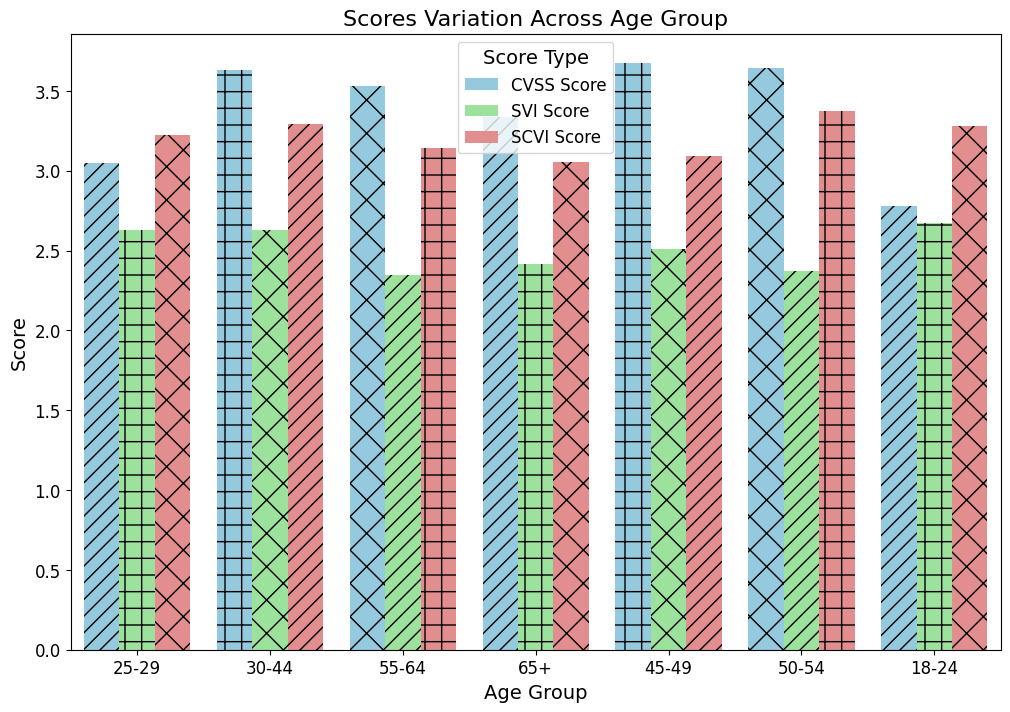

<ipython-input-11-f97bfdca5705>:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(


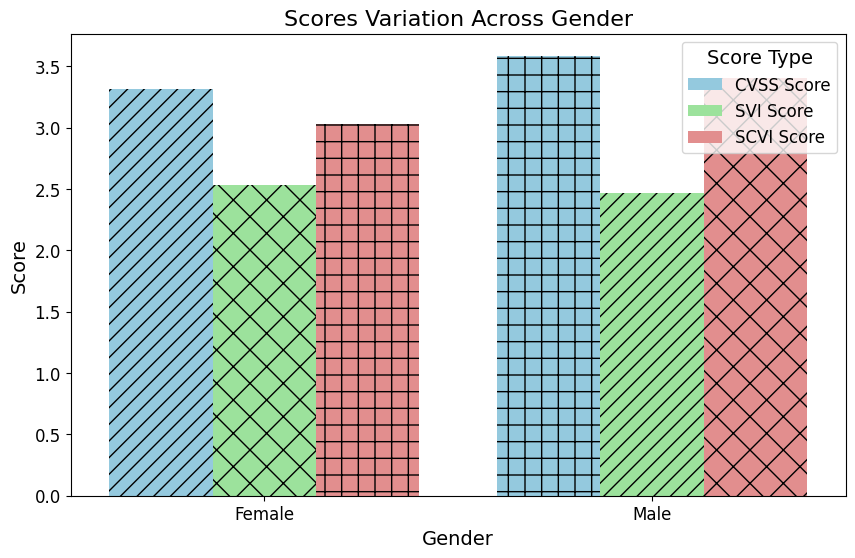

<ipython-input-11-f97bfdca5705>:83: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax3 = sns.barplot(


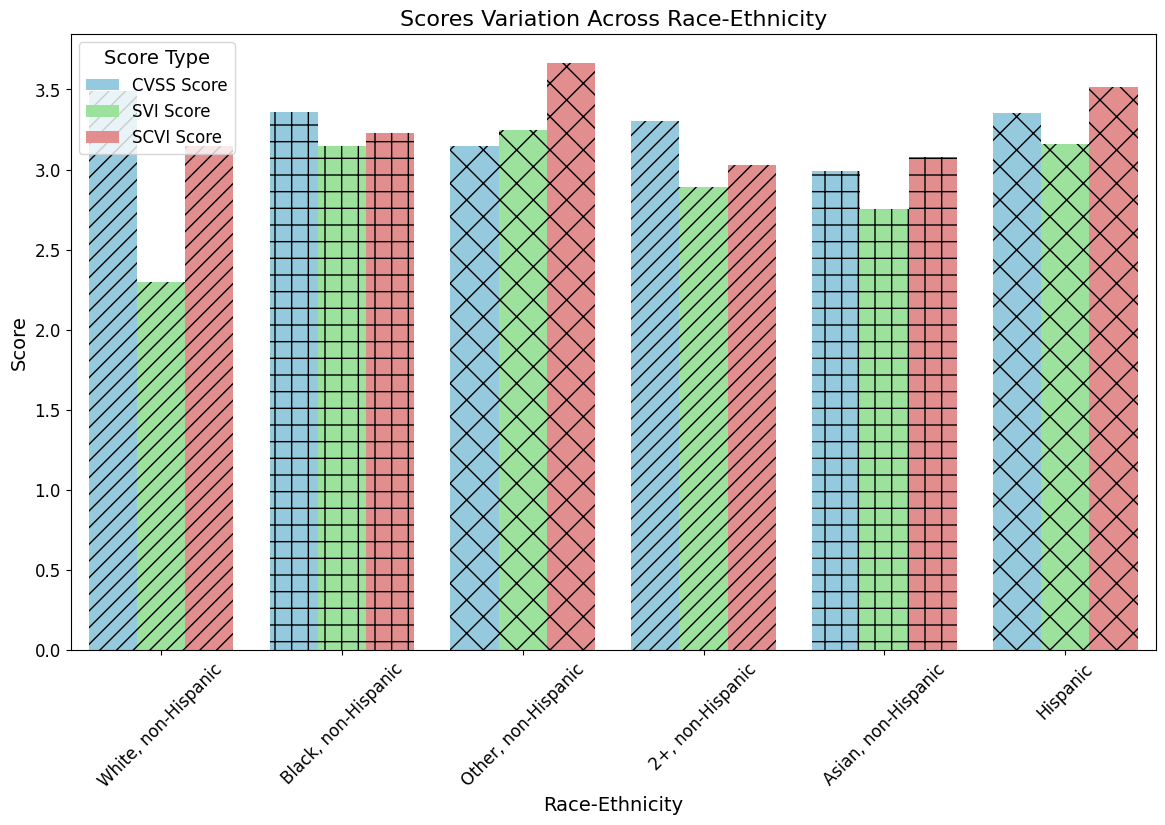

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cvss, df_svi, df_scvi, and df are already loaded

# Merge df_cvss and df_svi on 'Respondent_ID'
df_merged = df_cvss[['Respondent_ID', 'CVSS_Score_overall']].merge(
    df_svi[['Respondent_ID', 'Total_SVI_Score']], on='Respondent_ID', how='inner')

# Merge the result with df_scvi
df_merged = df_merged.merge(
    df_scvi[['Respondent_ID', 'SCVI']], on='Respondent_ID', how='inner')

# Merge the result with demographic variables from df
df_merged = df_merged.merge(
    df[['Respondent_ID', 'gender', 'racethni', 'age7']], on='Respondent_ID', how='inner')

# Melt the DataFrame to have a long format for the scores
df_plot = df_merged.melt(
    id_vars=['Respondent_ID', 'gender', 'racethni', 'age7'],
    value_vars=['CVSS_Score_overall', 'Total_SVI_Score', 'SCVI'],
    var_name='Score_Type',
    value_name='Score'
)

# Replace NaN values with 0 for plotting purposes (if any)
df_plot['Score'] = df_plot['Score'].fillna(0)

# Simplify 'Score_Type' for better legend labels
df_plot['Score_Type'] = df_plot['Score_Type'].replace({
    'CVSS_Score_overall': 'CVSS Score',
    'Total_SVI_Score': 'SVI Score',
    'SCVI': 'SCVI Score'
})

# Define colors and patterns
colors = ['skyblue', 'lightgreen', 'lightcoral']
patterns = ['//', '+', 'x']

# Function to add patterns to bars
def add_patterns(ax, patterns, n_categories):
    bars = ax.patches
    n_scores = len(patterns)
    hatches = []
    for i in range(n_categories):
        hatches.extend(patterns)
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

# Plot 1: Scores by Age Group
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(
    x='age7', y='Score', hue='Score_Type', data=df_plot,
    palette=colors, ci=None
)
add_patterns(ax1, patterns, n_categories=df_plot['age7'].nunique())
plt.title('Scores Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Score Type', fontsize=12, title_fontsize=14)
plt.show()

# Plot 2: Scores by Gender
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(
    x='gender', y='Score', hue='Score_Type', data=df_plot,
    palette=colors, ci=None
)
add_patterns(ax2, patterns, n_categories=df_plot['gender'].nunique())
plt.title('Scores Variation Across Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Score Type', fontsize=12, title_fontsize=14)
plt.show()

# Plot 3: Scores by Race-Ethnicity
plt.figure(figsize=(14, 8))
ax3 = sns.barplot(
    x='racethni', y='Score', hue='Score_Type', data=df_plot,
    palette=colors, ci=None
)
add_patterns(ax3, patterns, n_categories=df_plot['racethni'].nunique())
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Scores Variation Across Race-Ethnicity', fontsize=16)
plt.xlabel('Race-Ethnicity', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Score Type', fontsize=12, title_fontsize=14)
plt.show()


In [ ]:
# Merge the DataFrames
df_scores = df_cvss[['Respondent_ID', 'CVSS_Score_overall']].merge(
    df_svi[['Respondent_ID', 'Total_SVI_Score']], on='Respondent_ID', how='inner'
).merge(
    df_scvi[['Respondent_ID', 'SCVI']], on='Respondent_ID', how='inner'
)


In [ ]:
df_scores['CVSS_Score_overall'].min()

0.9

In [ ]:
df_scores['CVSS_Score_overall'].max()

10.0

In [ ]:
df_scores['Total_SVI_Score'].min()

1.1672559710579755

In [ ]:
df_scores['Total_SVI_Score'].max()

4.72045438062083

In [ ]:
df_scores['SCVI'].min()

0.0

In [ ]:
df_scores['SCVI'].max()

12.748555018007204

In [ ]:
# Rename the columns
df_scores.rename(columns={'CVSS_Score_overall': 'CVSS', 'Total_SVI_Score': 'SVI'}, inplace=True)


In [ ]:
df_scores['CVSS'] = df_scores['CVSS'].fillna(0)
df_scores['SCVI'] = df_scores['SCVI'].fillna(0)
df_scores['SVI'] = df_scores['SVI'].fillna(0)

In [ ]:
df_scores['CVSS_rescaled'] = df_scores['CVSS'] / 2


In [ ]:
# Compute the scaling factor for SCVI
scvi_max = df_scores['SCVI'].max()  # This is 12.748555018007204
scvi_scaling_factor = 5 / scvi_max

# Rescale SCVI
df_scores['SCVI_rescaled'] = df_scores['SCVI'] * scvi_scaling_factor


In [ ]:
print('Rescaled CVSS:')
print('Min:', df_scores['CVSS_rescaled'].min())
print('Max:', df_scores['CVSS_rescaled'].max())

print('Rescaled SCVI:')
print('Min:', df_scores['SCVI_rescaled'].min())
print('Max:', df_scores['SCVI_rescaled'].max())


Rescaled CVSS:
Min: 0.45
Max: 5.0
Rescaled SCVI:
Min: 0.0
Max: 5.0


In [ ]:
# Compute Pearson correlation coefficients
pearson_corr = df_scores[['CVSS', 'SVI', 'SCVI']].corr(method='pearson')

print("Pearson Correlation Matrix:")
print(pearson_corr)


Pearson Correlation Matrix:
          CVSS       SVI      SCVI
CVSS  1.000000 -0.062309  0.163686
SVI  -0.062309  1.000000  0.038735
SCVI  0.163686  0.038735  1.000000


In [ ]:
# Compute Spearman correlation coefficients
spearman_corr = df_scores[['CVSS', 'SVI', 'SCVI']].corr(method='spearman')

print("Spearman Correlation Matrix:")
print(spearman_corr)


Spearman Correlation Matrix:
          CVSS       SVI      SCVI
CVSS  1.000000 -0.010336  0.330972
SVI  -0.010336  1.000000 -0.018018
SCVI  0.330972 -0.018018  1.000000


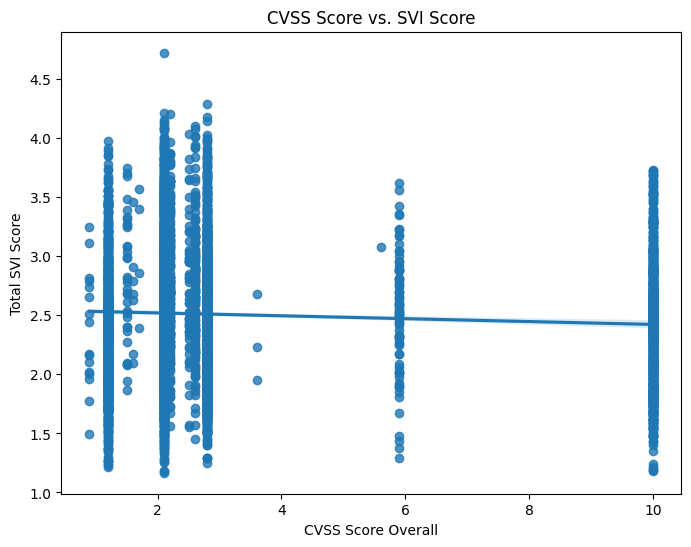

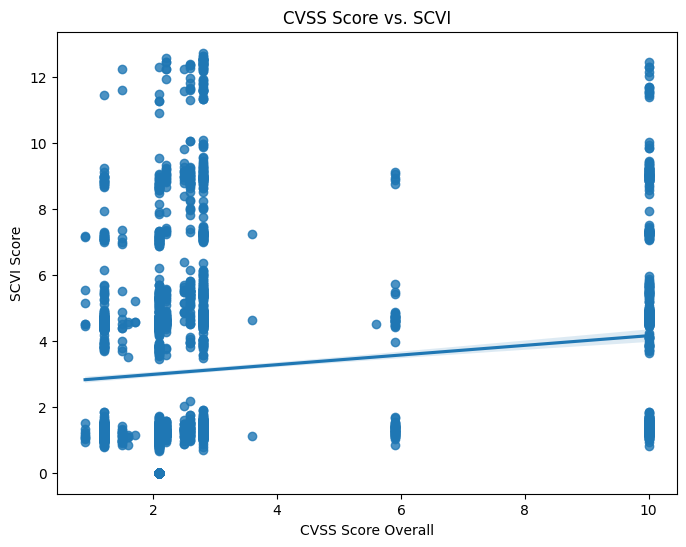

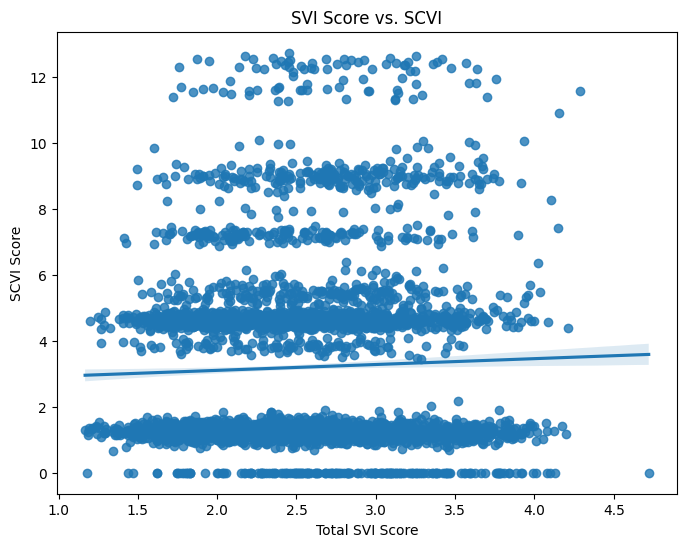

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between CVSS and SVI
plt.figure(figsize=(8, 6))
sns.regplot(x='CVSS', y='SVI', data=df_scores)
plt.title('CVSS Score vs. SVI Score')
plt.xlabel('CVSS Score Overall')
plt.ylabel('Total SVI Score')
plt.show()

# Scatter plot between CVSS and SCVI
plt.figure(figsize=(8, 6))
sns.regplot(x='CVSS', y='SCVI', data=df_scores)
plt.title('CVSS Score vs. SCVI')
plt.xlabel('CVSS Score Overall')
plt.ylabel('SCVI Score')
plt.show()

# Scatter plot between SVI and SCVI
plt.figure(figsize=(8, 6))
sns.regplot(x='SVI', y='SCVI', data=df_scores)
plt.title('SVI Score vs. SCVI')
plt.xlabel('Total SVI Score')
plt.ylabel('SCVI Score')
plt.show()


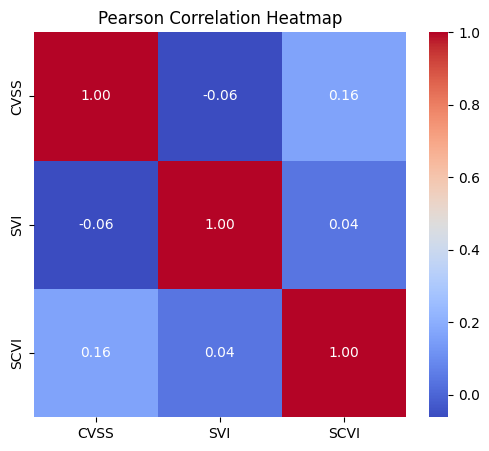

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()


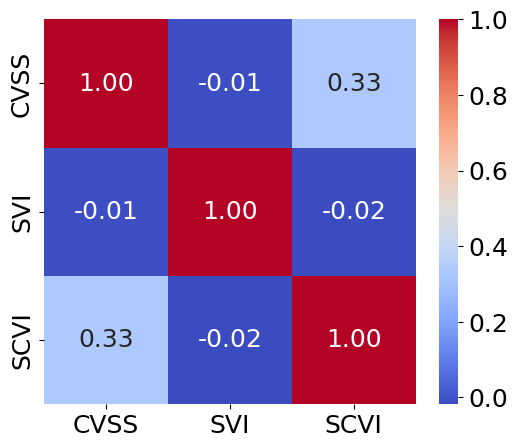

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(6, 5))
heatmap = sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 18})  # Increase annotation font size

# Increase title font size
#plt.title('Spearman Correlation Heatmap', fontsize=14)

# Increase colorbar font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
# Increase axis label font sizes


# Increase x and y tick label font sizes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('spearman_correlation_heatmap.jpeg')
plt.show()

In [ ]:
import statsmodels.api as sm

# Define independent variables and dependent variable
X = df_scores[['SVI', 'CVSS']]
y = df_scores['SCVI']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   SCVI   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     69.07
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           2.80e-30
Time:                        16:15:10   Log-Likelihood:                -10909.
No. Observations:                4596   AIC:                         2.182e+04
Df Residuals:                    4593   BIC:                         2.184e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1186      0.180     11.771      0.0

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Function to compute correlation and p-value
def compute_corr_pval(x, y, method='pearson'):
    if method == 'pearson':
        corr_coef, p_value = pearsonr(x, y)
    elif method == 'spearman':
        corr_coef, p_value = spearmanr(x, y)
    return corr_coef, p_value

# Compute Pearson and Spearman correlations and p-values between CVSS, SVI, and SCVI

# CVSS and SVI
cvss_svi_pearson_corr, cvss_svi_pearson_p = compute_corr_pval(
    df_scores['CVSS'], df_scores['SVI'], method='pearson')
cvss_svi_spearman_corr, cvss_svi_spearman_p = compute_corr_pval(
    df_scores['CVSS'], df_scores['SVI'], method='spearman')

print(f"Pearson Correlation between CVSS and SVI: {cvss_svi_pearson_corr:.2f}, p-value: {cvss_svi_pearson_p:.4f}")
print(f"Spearman Correlation between CVSS and SVI: {cvss_svi_spearman_corr:.2f}, p-value: {cvss_svi_spearman_p:.4f}")

# CVSS and SCVI
cvss_scvi_pearson_corr, cvss_scvi_pearson_p = compute_corr_pval(
    df_scores['CVSS'], df_scores['SCVI'], method='pearson')
cvss_scvi_spearman_corr, cvss_scvi_spearman_p = compute_corr_pval(
    df_scores['CVSS'], df_scores['SCVI'], method='spearman')

print(f"Pearson Correlation between CVSS and SCVI: {cvss_scvi_pearson_corr:.2f}, p-value: {cvss_scvi_pearson_p:.4f}")
print(f"Spearman Correlation between CVSS and SCVI: {cvss_scvi_spearman_corr:.2f}, p-value: {cvss_scvi_spearman_p:.4f}")

# SVI and SCVI
svi_scvi_pearson_corr, svi_scvi_pearson_p = compute_corr_pval(
    df_scores['SVI'], df_scores['SCVI'], method='pearson')
svi_scvi_spearman_corr, svi_scvi_spearman_p = compute_corr_pval(
    df_scores['SVI'], df_scores['SCVI'], method='spearman')

print(f"Pearson Correlation between SVI and SCVI: {svi_scvi_pearson_corr:.2f}, p-value: {svi_scvi_pearson_p:.4f}")
print(f"Spearman Correlation between SVI and SCVI: {svi_scvi_spearman_corr:.2f}, p-value: {svi_scvi_spearman_p:.4f}")


Pearson Correlation between CVSS and SVI: -0.06, p-value: 0.0000
Spearman Correlation between CVSS and SVI: -0.01, p-value: 0.4836
Pearson Correlation between CVSS and SCVI: 0.16, p-value: 0.0000
Spearman Correlation between CVSS and SCVI: 0.33, p-value: 0.0000
Pearson Correlation between SVI and SCVI: 0.04, p-value: 0.0086
Spearman Correlation between SVI and SCVI: -0.02, p-value: 0.2220


In [ ]:
# Calculate sample sizes
age_group_sample_size = df['age7'].value_counts()
raceethni_sample_size = df['racethni'].value_counts()
gender_sample_size = df['gender'].value_counts()

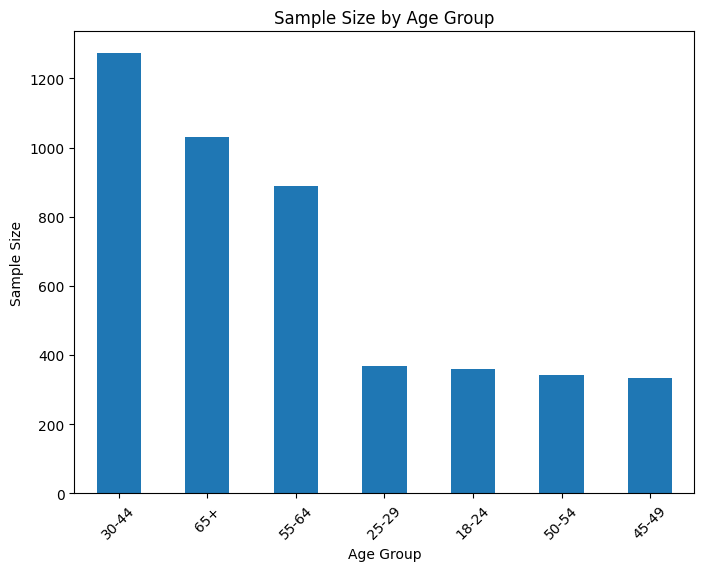

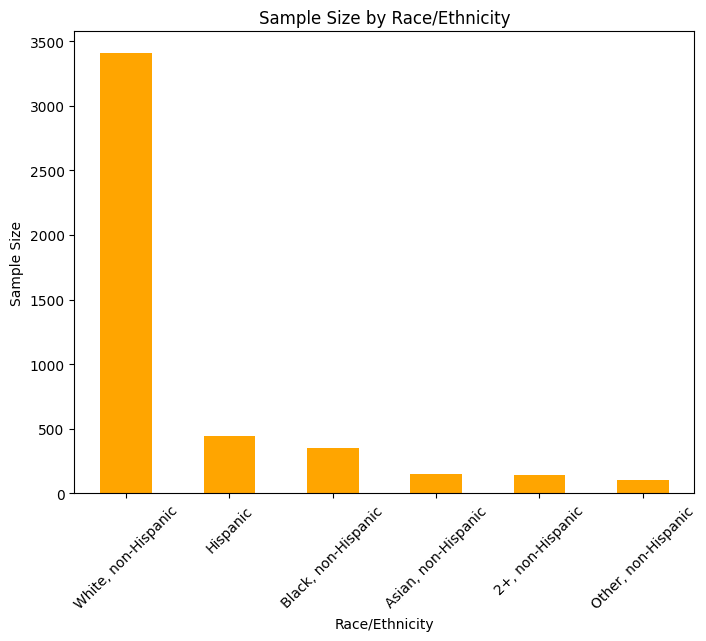

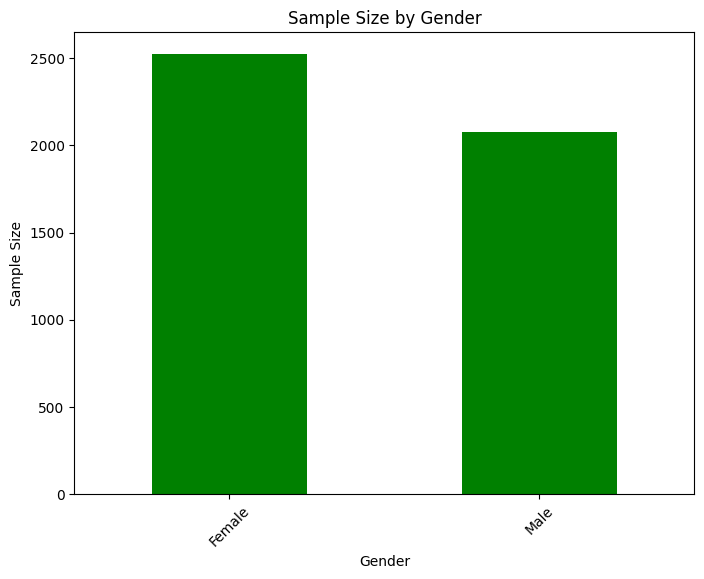

In [ ]:
# Plot sample size by age group
plt.figure(figsize=(8, 6))
age_group_sample_size.plot(kind='bar', title='Sample Size by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sample Size')
plt.xticks(rotation=45)
plt.show()

# Plot sample size by race/ethnicity
plt.figure(figsize=(8, 6))
raceethni_sample_size.plot(kind='bar', title='Sample Size by Race/Ethnicity', color='orange')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Sample Size')
plt.xticks(rotation=45)
plt.show()

# Plot sample size by gender
plt.figure(figsize=(8, 6))
gender_sample_size.plot(kind='bar', title='Sample Size by Gender', color='green')
plt.xlabel('Gender')
plt.ylabel('Sample Size')
plt.xticks(rotation=45)
plt.show()

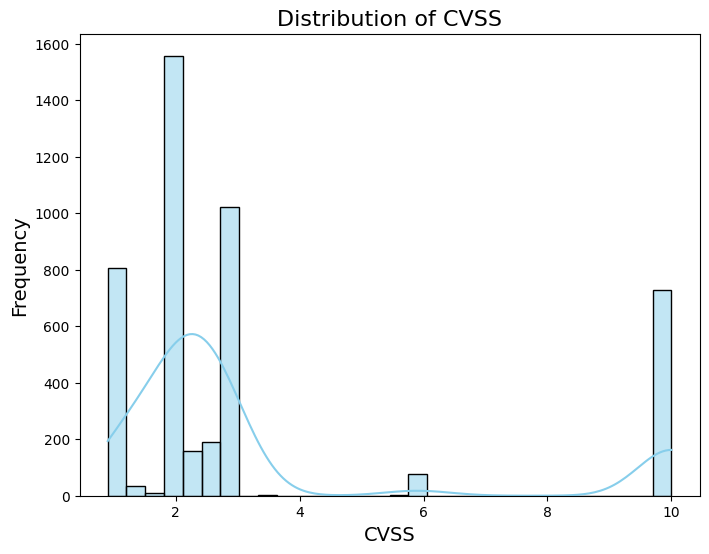

CVSS - Shapiro-Wilk Test: Statistic=0.618, p-value=0.000
CVSS - D’Agostino and Pearson Test: Statistic=1185.844, p-value=0.000
--------------------------------------------------


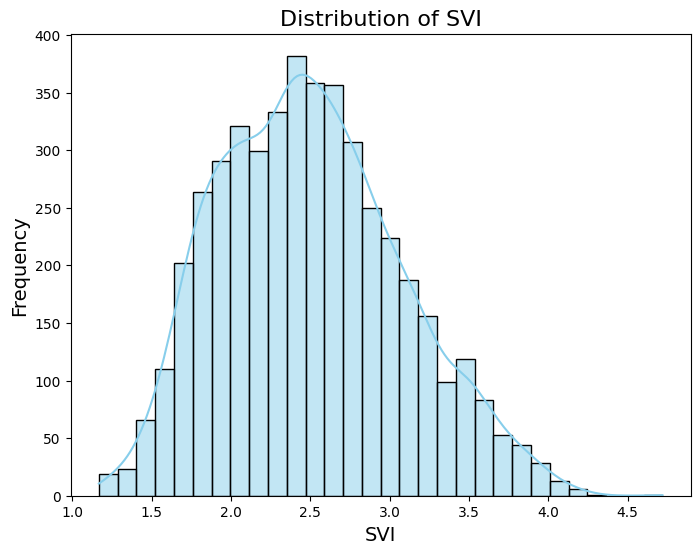

SVI - Shapiro-Wilk Test: Statistic=0.988, p-value=0.000
SVI - D’Agostino and Pearson Test: Statistic=115.440, p-value=0.000
--------------------------------------------------


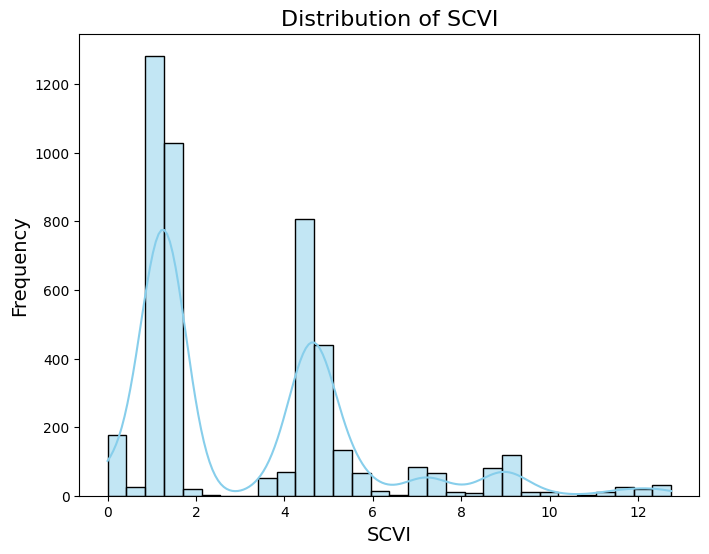

SCVI - Shapiro-Wilk Test: Statistic=0.822, p-value=0.000
SCVI - D’Agostino and Pearson Test: Statistic=823.896, p-value=0.000
--------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest

# Select variables for analysis
variables = ['CVSS', 'SVI', 'SCVI']  # Replace with your actual column names
df = df_scores[variables]  # Assuming df_scores contains these variables

# Plot distributions
for col in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

    # Perform Shapiro-Wilk test for normality
    stat, p_value = shapiro(df[col].dropna())
    print(f"{col} - Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p_value:.3f}")

    # Perform D’Agostino and Pearson’s test for normality
    stat, p_value = normaltest(df[col].dropna())
    print(f"{col} - D’Agostino and Pearson Test: Statistic={stat:.3f}, p-value={p_value:.3f}")
    print("-" * 50)


In [ ]:
df_scores.head()

,Respondent_ID,CVSS,SVI,SCVI,CVSS_rescaled,SCVI_rescaled
0,0,10.0,2.670030,1.445490,5.00,0.566923
1,1,2.6,2.593485,1.344246,1.30,0.527215
2,2,2.8,2.898041,4.540841,1.40,1.780924
3,3,2.8,2.362667,1.177496,1.40,0.461815
4,4,2.1,2.734934,4.677992,1.05,1.834715


    Group          Score_Type  Weighted_Mean
0  Female  CVSS_Score_overall       3.311568
1    Male  CVSS_Score_overall       3.583198
2  Female     Total_SVI_Score       2.530697
3    Male     Total_SVI_Score       2.468423
4  Female                SCVI            NaN
5    Male                SCVI            NaN
Effect Size (Cohen's d) for SVI: -0.11039188836166167
   Gender  CI_Lower  CI_Upper
0  Female  2.507657  2.552998
1    Male  2.442687  2.491305


<ipython-input-40-71491bdf470a>:95: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(


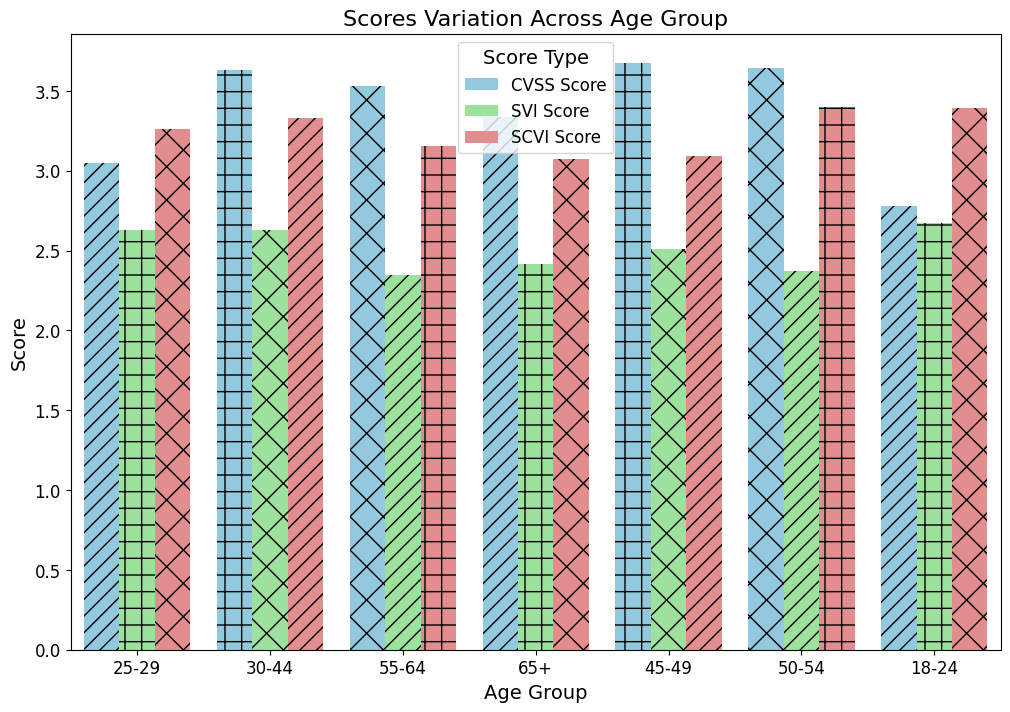

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, norm
from statsmodels.stats.weightstats import DescrStatsW

# Assuming `df_merged` from the provided example is already created

# ================= Weighted Analysis =================
def weighted_mean(data, value_col, weight_col):
    """Compute the weighted mean of a column."""
    dsw = DescrStatsW(data[value_col], weights=data[weight_col], ddof=0)
    return dsw.mean

def calculate_weighted_means(df, group_col, score_cols, weight_col):
    weighted_results = []
    for score in score_cols:
        for group, group_data in df.groupby(group_col):
            weighted_mean_value = weighted_mean(group_data, score, weight_col)
            weighted_results.append({'Group': group, 'Score_Type': score, 'Weighted_Mean': weighted_mean_value})
    return pd.DataFrame(weighted_results)

# Add a synthetic weight column if not available (for example purposes)
df_merged['Weight'] = np.random.uniform(0.8, 1.2, size=len(df_merged))

# Calculate weighted means for scores
weighted_means = calculate_weighted_means(df_merged, 'gender', ['CVSS_Score_overall', 'Total_SVI_Score', 'SCVI'], 'Weight')
print(weighted_means)

# ================= Effect Size =================
def compute_effect_size(group1, group2):
    """Compute Cohen's d as an effect size."""
    n1, n2 = len(group1), len(group2)
    s1, s2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    mean_diff = np.mean(group1) - np.mean(group2)
    return mean_diff / pooled_std

# Example: Effect size between male and female scores for SVI
group1 = df_merged[df_merged['gender'] == 'Male']['Total_SVI_Score']
group2 = df_merged[df_merged['gender'] == 'Female']['Total_SVI_Score']
effect_size_svi = compute_effect_size(group1, group2)
print(f"Effect Size (Cohen's d) for SVI: {effect_size_svi}")

# ================= Confidence Intervals =================
def confidence_interval(data, confidence=0.95):
    """Compute confidence intervals."""
    mean = np.mean(data)
    se = np.std(data, ddof=1) / np.sqrt(len(data))
    margin = se * norm.ppf((1 + confidence) / 2)
    return mean - margin, mean + margin

# Example: Confidence interval for SVI by gender
ci_results = []
for gender, group_data in df_merged.groupby('gender'):
    ci = confidence_interval(group_data['Total_SVI_Score'])
    ci_results.append({'Gender': gender, 'CI_Lower': ci[0], 'CI_Upper': ci[1]})

ci_df = pd.DataFrame(ci_results)
print(ci_df)

# ================= Visualization =================
# Melt the DataFrame for visualization
df_plot = df_merged.melt(
    id_vars=['Respondent_ID', 'gender', 'racethni', 'age7'],
    value_vars=['CVSS_Score_overall', 'Total_SVI_Score', 'SCVI'],
    var_name='Score_Type',
    value_name='Score'
)

# Simplify 'Score_Type' for better legend labels
df_plot['Score_Type'] = df_plot['Score_Type'].replace({
    'CVSS_Score_overall': 'CVSS Score',
    'Total_SVI_Score': 'SVI Score',
    'SCVI': 'SCVI Score'
})

# Define colors and patterns
colors = ['skyblue', 'lightgreen', 'lightcoral']
patterns = ['//', '+', 'x']

def add_patterns(ax, patterns, n_categories):
    """Add patterns to bars."""
    bars = ax.patches
    n_scores = len(patterns)
    hatches = []
    for i in range(n_categories):
        hatches.extend(patterns)
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

# Plot: Scores by Age Group
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(
    x='age7', y='Score', hue='Score_Type', data=df_plot,
    palette=colors, ci=None
)
add_patterns(ax1, patterns, n_categories=df_plot['age7'].nunique())
plt.title('Scores Variation Across Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Score Type', fontsize=12, title_fontsize=14)
plt.show()

# Similar plots can be created for Gender and Race-Ethnicity as in the original code.
